In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np

For non filtere aproach

In [9]:
directory_path = 'experiment_prepo/'

# List all files that contain 'prepro_experiment_outs_visitkmeans' in their names
files = [f for f in os.listdir(directory_path) if 'prepro_experiment_outs_visitkmeans' in f]
files

['prepro_experiment_outs_visitkmeans_cat_threshold .98 most frequent_nonfiltered.csv',
 'prepro_experiment_outs_visitkmeans_cat_threshold .999 most frequent_nonfiltered.csv',
 'prepro_experiment_outs_visitkmeans_cat_threshold .88 most frequent_nonfiltered.csv',
 'prepro_experiment_outs_visitkmeans_cat_threshold .95 most frequent_proc_nonfiltered.csv',
 'prepro_experiment_outs_visitkmeans_ICD9_CODE_procedures_nonfiltered.csv',
 'prepro_experiment_outs_visitkmeans_CCS CODES_proc_nonfiltered.csv']

In [92]:
directory_path = 'experiment_prepo/'

# List all files that contain 'prepro_experiment_outs_visitkmeans' in their names
files = [f for f in os.listdir(directory_path) if 'prepro_experiment_Patientkmeans' in f]
files

['prepro_experiment_Patientkmeans_cat_threshold .98 most frequent_nonfiltered.csv',
 'prepro_experiment_Patientkmeans_CCS CODES_proc_nonfiltered.csv',
 'prepro_experiment_Patientkmeans_cat_threshold .999 most frequent_nonfiltered.csv',
 'prepro_experiment_Patientkmeans_ICD9_CODE_procedures_nonfiltered.csv',
 'prepro_experiment_Patientkmeans_cat_threshold .88 most frequent_nonfiltered.csv',
 'prepro_experiment_Patientkmeans_cat_threshold .95 most frequent_proc_nonfiltered.csv']

In [93]:
# concatenar los dataframes
list_data =[]
for i in files:
    list_data.append(pd.read_csv(directory_path + i))
    
concatenated_df = pd.concat(list_data, axis=0)
concatenated_df[concatenated_df.notnull()]   

,Unnamed: 0,Name,Prepro,Num Cluster,silhouette_avg,davies_bouldin_avg
0,0,cat_threshold .88 most frequent,std,4,0.215970,4.360700
1,1,cat_threshold .88 most frequent,std,8,0.107266,3.639773
2,2,cat_threshold .88 most frequent,std,12,-0.081892,3.361172
3,3,cat_threshold .88 most frequent,max,4,0.214877,1.609863
4,4,cat_threshold .88 most frequent,max,8,0.201072,1.682638
...,...,...,...,...,...,...
22,22,cat_threshold .95 most frequent_proc,max,8,0.155810,1.925953
23,23,cat_threshold .95 most frequent_proc,max,12,0.166851,2.001679
24,24,cat_threshold .95 most frequent_proc,power,4,0.196832,4.859073
25,25,cat_threshold .95 most frequent_proc,power,8,0.140059,4.218992


In [96]:
df_p1 = concatenated_df.reset_index()

In [51]:
df_p1 = df_p1.drop_duplicates()

In [97]:
df_p1 = df_p1.rename(columns={'silhouette_avg': 'silhouette_avg_p',
                              'davies_bouldin_avg': 'davies_bouldin_avg_p',
                              })

# Print the updated DataFrame
df_p1.shape

(100, 7)

In [98]:
df_p.shape
merged_df = pd.merge(df_p, df_p1, on=["Name", "Prepro", "Num Cluster"] , how = 'inner')

# Print the merged DataFrame
print(merged_df.shape)

NameError: name 'df_p' is not defined

In [74]:
merged_df

,index_x,Unnamed: 0_x,Name,Prepro,Num Cluster,silhouette_avg,davies_bouldin_avg,index_y,Unnamed: 0_y,silhouette_avg_p,davies_bouldin_avg_p
0,0,0,threshold .88,std,4,0.112400,4.120806,0,0,0.112400,4.120806
1,1,1,threshold .88,std,8,0.101949,3.511892,1,1,0.101949,3.511892
2,2,2,threshold .88,std,12,-0.088497,3.259596,2,2,-0.088497,3.259596
3,3,3,threshold .88,max,4,0.143572,2.383763,3,3,0.143572,2.383763
4,4,4,threshold .88,max,8,0.153286,2.295249,4,4,0.153286,2.295249
5,5,5,threshold .88,max,12,0.140656,2.020126,5,5,0.140656,2.020126
6,6,6,threshold .88,power,4,0.026333,4.432458,6,6,0.026333,4.432458
7,7,7,threshold .88,power,8,0.050476,3.632960,7,7,0.050476,3.632960
8,8,8,threshold .88,power,12,-0.092206,3.364309,8,8,-0.092206,3.364309
9,9,9,threshold .98,std,4,0.058904,4.369679,9,9,0.058904,4.369679


In [18]:
idx = df_p.groupby(["Name" ])["silhouette_avg"].idxmax()

# Obtener las filas correspondientes al índice máximo de "Score Sihouate"
result = df_p.loc[idx, ["Name", "Prepro", "Num Cluster","silhouette_avg"]].drop_duplicates()

result.sort_values(by=['silhouette_avg'])

,Name,Prepro,Num Cluster,silhouette_avg
67,cat_threshold .95 most frequent_proc,max,8,0.146208
4,cat_threshold .88 most frequent,max,8,0.153286
58,CCS CODES_proc,max,8,0.208664
42,cat_threshold .999 most frequent,power,4,0.289741
78,ICD9_CODE_procedures,power,4,0.312782
15,cat_threshold .98 most frequent,power,4,0.406294


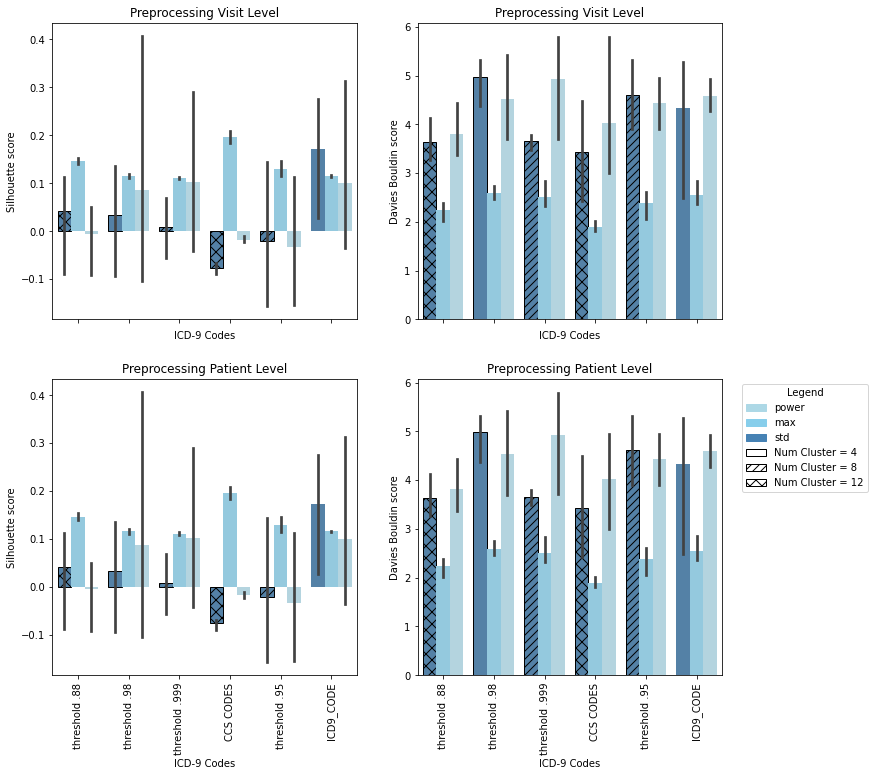

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec

# Assuming df_p is already defined and contains the relevant data
# Here we are creating a mock dataframe for demonstration purposes

# Define the patterns for the number of clusters
patterns = {4: "", 8: "///", 12: "xx"}

# Define a shades of blue color palette
palette = {"power": "lightblue", "max": "skyblue", "std": "steelblue"}

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Flatten the array of axes for easy iterating
axs = axs.flatten()

# Loop over the number of plots
scores = ['Silhouette score', 'Davies Bouldin score', 'Silhouette score', 'Davies Bouldin score']
title_1  = ['Preprocessing visit level',  'Preprocessing visit level','Preprocessing patient level', 'Preprocessing patient level']
for i, metric in enumerate(['silhouette_avg', 'davies_bouldin_avg','silhouette_avg_p', 'davies_bouldin_avg_p'] ):
    ax = axs[i]
    sns.barplot(x='Name', y=metric, hue='Prepro', data=merged_df, ax=ax, palette=palette)
    ax.set_title(title_1[i].title())
    
    ax.set_ylabel(scores[i])
    ax.set_xlabel('ICD-9 Codes')
    # Add patterns to bars and set the bar edge color to black for clarity
    for bar, pattern in zip(ax.patches, df['Num Cluster']):
        bar.set_hatch(patterns[pattern])
        bar.set_edgecolor('black')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Remove the legend from each subplot after the first one
    if i >= 0:
        ax.get_legend().remove()
        
    if i < 2:
        ax.set_xticklabels([]) 
        


# Creating custom legends for preprocessing methods and cluster patterns
prepro_patches = [Patch(color=palette[name], label=name) for name in palette]
pattern_patches = [Patch(facecolor='white', edgecolor='black', hatch=patterns[n], label=f'Num Cluster = {n}') for n in patterns]

# Add the custom legends to the right of the plots
plt.legend(handles=prepro_patches + pattern_patches, loc='upper left', bbox_to_anchor=(1.05, 1), title='Legend')

plt.show()



In [65]:
# Assuming df_p1 is already defined and contains the relevant data
# Replace df_p with df_p1 in your code

df_p1["Name"] = df_p1["Name"].replace('CCS CODES_proc', 'CCS CODES')
df_p1["Name"] = df_p1["Name"].replace('ICD9_CODE_procedures', 'ICD9_CODE')
df_p1["Name"] = df_p1["Name"].replace('cat_threshold .88 most frequent', 'threshold .88')
df_p1["Name"] = df_p1["Name"].replace('cat_threshold .999 most frequent', 'threshold .999')
df_p1["Name"] = df_p1["Name"].replace('cat_threshold .98 most frequent', 'threshold .98')
df_p1["Name"] = df_p1["Name"].replace('cat_threshold .95 most frequent_proc', 'threshold .95')
df_p1["Name"] = df_p1["Name"].replace('sin_codigo', 'No ICD9-Code')

# This will update the "Name" column in df_p1 with the specified replacements.


In [2]:
type_a=stri ="visit.csv"
df_p =pd.read_csv("/Users/cgarciay/Desktop/Laval_Master_Computer/research/experiment_prepo/prepro_experiment_"+type_a+"")

In [26]:
df_p["Name"] = df_p["Name"].replace('CCS CODES_proc', 'CCS CODES')
df_p["Name"] = df_p["Name"].replace('ICD9_CODE_procedures', 'ICD9_CODE')
df_p["Name"] = df_p["Name"].replace('cat_threshold .88 most frequent', 'threshold .88')
df_p["Name"] = df_p["Name"].replace('cat_threshold .999 most frequent', 'threshold .999')
df_p["Name"] = df_p["Name"].replace('cat_threshold .98 most frequent', 'threshold .98')
df_p["Name"] = df_p["Name"].replace('cat_threshold .95 most frequent_proc', 'threshold .95')
df_p["Name"] = df_p["Name"].replace('sin_codigo', 'No ICD9-Code')


In [4]:
df_p.iloc[:, 1:6].head()

,Name,Prepro,Num Cluster,silhouette_avg,davies_bouldin_avg
0,ICD9_CODE,power,12,0.060873,2.359052
1,ICD9_CODE,max,4,0.072957,2.676974
2,ICD9_CODE,max,8,0.072525,2.684660
3,ICD9_CODE,std,12,0.166682,2.755554
4,ICD9_CODE,std,8,0.127807,2.824454


In [6]:
pivot_table

silhouette_avg
Name           Prepro Num Cluster                
CCS CODES      max    4                  0.109303
                      8                  0.102586
                      12                 0.083047
               power  4                  0.084427
                      8                  0.030085
                      12                 0.036853
               std    4                  0.227818
                      8                  0.054400
                      12                 0.087958
ICD9_CODE      max    4                  0.072957
                      8                  0.072525
                      12                 0.053218
               power  4                  0.183580
                      8                  0.063122
                      12                 0.060873
               std    4                  0.330059
                      8                  0.127807
                      12                 0.166682
threshold .88  max    4                  0.091894
                      8                  0.083503
                      12                 0.077204
               power  4                  0.194061
                      8                  0.119818
                      12                 0.085242
               std    4                  0.170829
                      8                  0.146122
                      12                 0.134318
threshold .95  max    4                  0.080000
                      8                  0.080000
                      12                 0.060000
               power  4                  0.130200
                      8                  0.090000
                      12                 0.070000
               std    4                  0.183504
                      8                  0.117203
                      12                 0.080000
threshold .98  max    4                  0.094774
                      8                  0.059715
                      12                 0.051207
               power  4                  0.135230
                      8                  0.087782
                      12                 0.075673
               std    4                  0.128983
                      8                  0.062640
                      12                 0.109071
threshold .999 max    4                  0.072513
                      8                  0.057259
                      12                 0.046971
               power  4                  0.213212
                      8                  0.125791
                      12                 0.159917
               std    4                  0.287062
                      8                  0.071205
                      12                 0.134659

In [5]:

#'davies_bouldin_avg'
# Suponiendo que 'data' es tu DataFrame
pivot_table = pd.pivot_table(df_p, 
                             index=['Name', 'Prepro', 'Num Cluster'], 
                             values=['silhouette_avg', ])


In [127]:
df.columns

Index(['Unnamed: 0', 'Name', 'Prepro', 'Num Cluster', 'silhouette_avg',
       'davies_bouldin_avg'],
      dtype='object')

In [86]:
pivot_table.head()

davies_bouldin_avg
Name      Prepro Num Cluster                    
CCS CODES max    4                      2.421101
                 8                      2.216372
                 12                     2.375342
          power  4                      4.477631
                 8                      3.341717

# prepo

In [7]:
ruta = "/Users/cgarciay/Desktop/Laval_Master_Computer/research/experiment_prepo/"
archivo = "prepro_experiment_Patientagglomerative_v2.csv"
archivo2 = "prepro_experiment_outs_visitagglomerative_v2.csv"
df = pd.read_csv(ruta + archivo2)


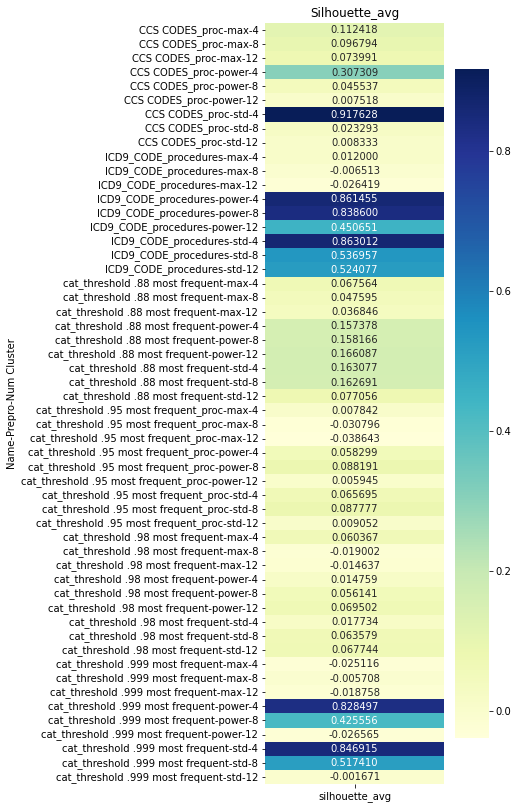

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Pivot the DataFrame for the heatmap
pivot_df = df.pivot_table(index=['Name', 'Prepro', 'Num Cluster'], values='silhouette_avg')

plt.figure(figsize=(4, 14))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".6f")
plt.title('Silhouette_avg')
plt.show()

{'Unnamed: 0': [8, 3, 4, 2, 1, 5, 0, 7, 6, 13, 11, 14, 12, 17, 10, 16, 9, 15, 21, 22, 23, 26, 20, 25, 19, 18, 24, 32, 30, 31, 29, 35, 28, 34, 33, 27, 39, 41, 40, 38, 44, 43, 37, 36, 42, 47, 48, 46, 45, 50, 49, 52, 53, 51], 'Name': ['ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .999', 'threshold .999', 'threshold .999', 'threshold .999', 'th

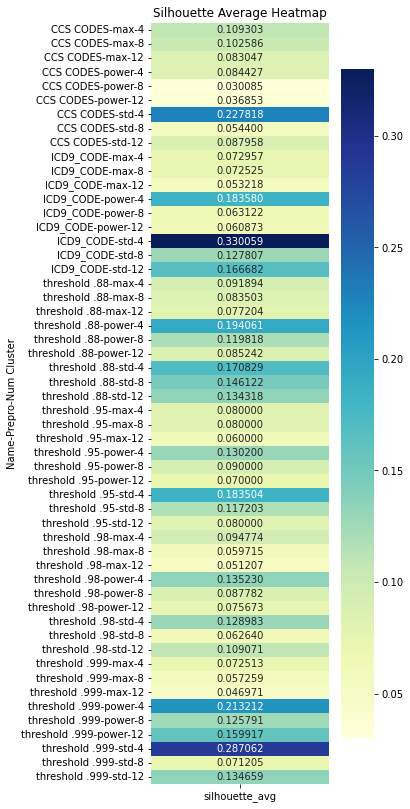

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = df_p.to_dict(orient='list')  
print(data)

df = pd.DataFrame(data)

# Pivot the DataFrame for the heatmap
pivot_df = df.pivot_table(index=['Name', 'Prepro', 'Num Cluster'], values='silhouette_avg')

plt.figure(figsize=(4, 14))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".6f")
plt.title('Silhouette Average Heatmap')
plt.show()


{'Unnamed: 0': [8, 3, 4, 2, 1, 5, 0, 7, 6, 13, 11, 14, 12, 17, 10, 16, 9, 15, 21, 22, 23, 26, 20, 25, 19, 18, 24, 32, 30, 31, 29, 35, 28, 34, 33, 27, 39, 41, 40, 38, 44, 43, 37, 36, 42, 47, 48, 46, 45, 50, 49, 52, 53, 51], 'Name': ['ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .999', 'threshold .999', 'threshold .999', 'threshold .999', 'th

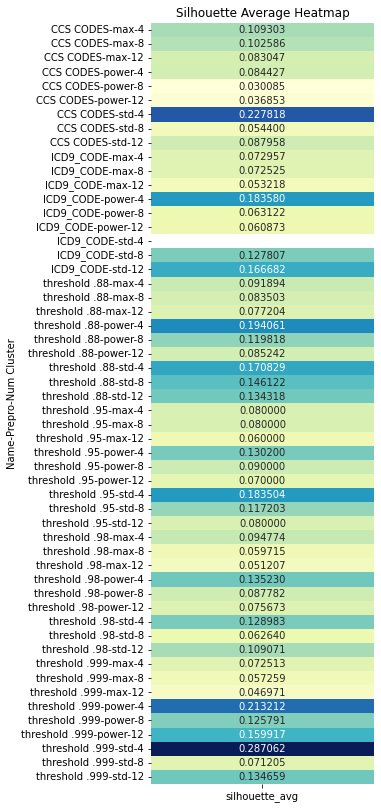

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = df_p.to_dict(orient='list')
print(data)

df = pd.DataFrame(data)

# Pivot the DataFrame for the heatmap
pivot_df = df.pivot_table(index=['Name', 'Prepro', 'Num Cluster'], values='silhouette_avg')

# Find the highest score
max_score = pivot_df.max().max()

# Create a mask to highlight the highest score
mask = pivot_df == max_score

plt.figure(figsize=(4, 14))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".6f", mask=mask, cbar=False)
plt.title('Silhouette Average Heatmap')
plt.show()

In [92]:
#df_metric = pd.read_csv("/Users/cgarciay/Desktop/Laval_Master_Computer/research/metricas_clustering_mapeo_visit.csv")
df_metric = pd.read_csv("/Users/cgarciay/Desktop/Laval_Master_Computer/research/metricas_clustering_mapeo_patient.csv")


In [93]:
df_metric.iloc[:,1:]

,Name,silhouette_avg,davies_bouldin_avg
0,ICD9_CODE_procedures,0.216942,4.943148
1,CCS CODES_proc,0.115206,3.841247
2,cat_threshold .95 most frequent_proc,0.091119,5.995203
3,cat_threshold .88 most frequent,0.134393,4.668190
4,cat_threshold .98 most frequent,0.082390,5.993767
5,cat_threshold .999 most frequent,0.072289,6.498342


{'Unnamed: 0': [0, 1, 2, 3, 4, 5], 'Name': ['ICD9_CODE_procedures', 'CCS CODES_proc', 'cat_threshold .95 most frequent_proc', 'cat_threshold .88 most frequent', 'cat_threshold .98 most frequent', 'cat_threshold .999 most frequent'], 'silhouette_avg': [0.2169421244905894, 0.1152061908074735, 0.0911189890628801, 0.1343934805682334, 0.0823900082438967, 0.0722891372312564], 'davies_bouldin_avg': [4.943147797097913, 3.8412472408337095, 5.995202922617511, 4.668189963069727, 5.993767393457838, 6.498342148572914]}


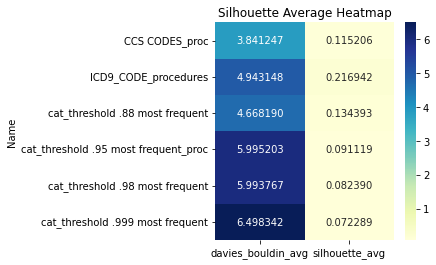

In [94]:
data = df_metric.to_dict(orient='list')  
print(data)

df = pd.DataFrame(data)

# Pivot the DataFrame for the heatmap
pivot_df = df.pivot_table(index=['Name', ], values=['silhouette_avg','davies_bouldin_avg'])

plt.figure(figsize=(4, 4))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".6f")
plt.title('Silhouette Average Heatmap')
plt.show()


# PREDICTIONS OF READMISSION

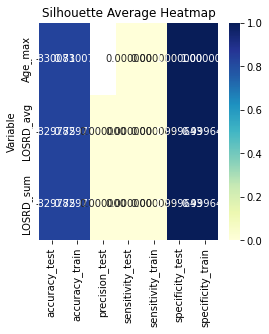

<Figure size 432x288 with 0 Axes>

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (the provided DataFrame)
data = {
    'Variable': ['Age_max', 'LOSRD_sum', 'LOSRD_avg'],
      'sensitivity_test': [0.0, 0.0, 0.0],
    'specificity_test': [1.0, 0.999643, 0.999643],
    'precision_test': [None, 0.0, 0.0],
    'accuracy_test': [0.830071, 0.829775, 0.829775],
    'sensitivity_train': [0.0, 0.0, 0.0],
    'specificity_train': [1.0, 0.999643, 0.999643],
  
    'accuracy_train': [0.830071, 0.829775, 0.829775]
}

df = pd.DataFrame(data)

# Set 'Variable' as the index
df.set_index('Variable', inplace=True)
pivot_df = df.pivot_table(index=['Variable', ], values=[i for i in df if i!= 'Variable'])


plt.figure(figsize=(4, 4))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".6f")
plt.title('Silhouette Average Heatmap')
plt.show()
plt.savefig("fig.png")

In [109]:
df

,sensitivity_test,specificity_test,precision_test,accuracy_test,sensitivity_train,specificity_train,accuracy_train
Variable,,,,,,,
Age_max,0.0,1.000000,NaN,0.830071,0.0,1.000000,0.830071
LOSRD_sum,0.0,0.999643,0.0,0.829775,0.0,0.999643,0.829775
LOSRD_avg,0.0,0.999643,0.0,0.829775,0.0,0.999643,0.829775


In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data setup (assuming the data is stored in a DataFrame named 'df')
data = {
    'Variable': ['X1', 'X2'],
       'sensitivity_test': [0.0, 0.0],
    'specificity_test': [1.0, 1.0],
    'precision_test': [None, None],
    'accuracy_test': [0.830071, 0.830071],
    'sensitivity_train': [0.0, 0.0],
    'specificity_train': [1.0, 1.0],
    'precision_train': [None, None],
    'accuracy_train': [0.830071, 0.830071]
}

df = pd.DataFrame(data)

df

,Variable,sensitivity_test,specificity_test,precision_test,accuracy_test,sensitivity_train,specificity_train,precision_train,accuracy_train
0,X1,0.0,1.0,None,0.830071,0.0,1.0,None,0.830071
1,X2,0.0,1.0,None,0.830071,0.0,1.0,None,0.830071


In [103]:
pivot_df

,Test Error,Training Error,accuracy_test,accuracy_train,precision_test,sensitivity_test,sensitivity_train,specificity_test,specificity_train
Variable,,,,,,,,,
Age_max,0.169929,0.181124,0.830071,0.830071,NaN,0.0,0.0,1.000000,1.000000
LOSRD_avg,0.170225,0.181198,0.829775,0.829775,0.0,0.0,0.0,0.999643,0.999643
LOSRD_sum,0.170225,0.181346,0.829775,0.829775,0.0,0.0,0.0,0.999643,0.999643


In [141]:
df_metric.columns

Index(['Unnamed: 0', 'Classifiers', 'sensitivity', 'specificity', 'precision',
       'accuracy', 'mean_auc', 'confusion matrix', 'Sampling',
       'Feature selection', 'f1', 'f1_train', 'sensitivity_train',
       'specificity_train', 'precision_train', 'accuracy_train', 'Mapping'],
      dtype='object')

In [140]:
df_metric["Classifiers"].unique()


array(['LogisticRegression', 'XGBClassifier'], dtype=object)

# Vis for results readmission

In [106]:
days = "90"

ruta2 ="/Users/cgarciay/Desktop/Laval_Master_Computer/research/results_pred/"
ar = "results_prediction_30+_realv3.csv"
archivo = "results_prediction_"+days+"+_realv3.csv"
archivo2 = "results_prediction_"+days+"+_realv2.csv"
df_metric = pd.read_csv(ruta2+ar)
df_metric2 = pd.read_csv(ruta2+archivo2)
df_metric.head()
are_identical = df_metric.equals(df_metric2)
are_identical

False

In [81]:
archivo

'results_prediction_30+_realv3.csv'

In [107]:
df_metric = df_metric[df_metric["Sampling"]=="non"]

In [109]:

df_metric["Mapping"] = df_metric["Mapping"].replace('CCS CODES_proc.csv', 'CCS CODES')
df_metric["Mapping"] = df_metric["Mapping"].replace('ICD9_CODE_procedures.csv', 'ICD9_CODE')
df_metric["Mapping"] = df_metric["Mapping"].replace('cat_threshold .88 most frequent.csv', 'threshold .88')
df_metric["Mapping"] = df_metric["Mapping"].replace('cat_threshold .999 most frequent.csv', 'threshold .999')
df_metric["Mapping"] = df_metric["Mapping"].replace('cat_threshold .98 most frequent.csv', 'threshold .98')
df_metric["Mapping"] = df_metric["Mapping"].replace('cat_threshold .95 most frequent_proc.csv', 'threshold .95')
df_metric["Mapping"] = df_metric["Mapping"].replace('sin_codigo.csv', 'No ICD9-Code')
df_metric["Classifiers"] = df_metric["Classifiers"].replace('LogisticRegression', 'LG')
df_metric["Classifiers"] = df_metric["Classifiers"].replace('XGBClassifier', 'XGB')
df_metric["Classifiers"] = df_metric["Classifiers"].replace('XGBClassifier', 'XGB')
df_metric["Sampling"] = df_metric["Sampling"].replace('non', 'n')
df_metric["Sampling"] = df_metric["Sampling"].replace('over', 'o')
df_metric["Feature selection"] = df_metric["Feature selection"].replace(True, 'T')
df_metric["Feature selection"] = df_metric["Feature selection"].replace(False, 'F')

                                                            



In [110]:
df_metric["Mapping"].unique()

array(['cat_threshold .98 most frequent_v2.csv',
       'ICD9_CODE_procedures_v2.csv', 'CCS CODES_proc_v2.csv',
       'cat_threshold .999 most frequent_v2.csv',
       'cat_threshold .88 most frequent_v2.csv', 'sin_codigo_v2.csv',
       'cat_threshold .95 most frequent_proc_v2.csv'], dtype=object)

In [111]:
df_metric["Mapping"] = df_metric["Mapping"].replace('CCS CODES_proc_v2.csv', 'CCS CODES')
df_metric["Mapping"] = df_metric["Mapping"].replace('ICD9_CODE_procedures_v2.csv', 'ICD9_CODE')
df_metric["Mapping"] = df_metric["Mapping"].replace('cat_threshold .88 most frequent_v2.csv', 'threshold .88')
df_metric["Mapping"] = df_metric["Mapping"].replace('cat_threshold .999 most frequent_v2.csv', 'threshold .999')
df_metric["Mapping"] = df_metric["Mapping"].replace('cat_threshold .98 most frequent_v2.csv', 'threshold .98')
df_metric["Mapping"] = df_metric["Mapping"].replace('cat_threshold .95 most frequent_proc_v2.csv', 'threshold .95')
df_metric["Mapping"] = df_metric["Mapping"].replace('sin_codigo_v2.csv', 'No ICD9-Code')
df_metric["Classifiers"] = df_metric["Classifiers"].replace('LogisticRegression', 'LG')
df_metric["Classifiers"] = df_metric["Classifiers"].replace('XGBClassifier', 'XGB')
df_metric["Classifiers"] = df_metric["Classifiers"].replace('XGBClassifier', 'XGB')
df_metric["Sampling"] = df_metric["Sampling"].replace('non', 'n')
df_metric["Sampling"] = df_metric["Sampling"].replace('over', 'o')
df_metric["Feature selection"] = df_metric["Feature selection"].replace(True, 'T')
df_metric["Feature selection"] = df_metric["Feature selection"].replace(False, 'F')

        

In [112]:
df_metric.head()

,Unnamed: 0,f1_test,f1_train,sensitivity_test,specificity_test,precision_test,accuracy_test,sensitivity_train,specificity_train,precision_train,accuracy_train,confusion matrix,Sampling,Feature selection,Classifiers,Mapping,var_change,var_ini
0,0,0.467869,0.469148,0.016910,0.998772,0.750000,0.823132,0.018153,0.998862,0.776596,0.823428,[[13827 17]\n [ 2965 51]],n,T,LG,threshold .98,697,709
1,1,0.467869,0.468981,0.016910,0.998772,0.750000,0.823132,0.017987,0.998862,0.775000,0.823399,[[13827 17]\n [ 2965 51]],n,F,LG,threshold .98,0,709
4,4,0.550875,0.736014,0.121684,0.978836,0.556061,0.825504,0.372430,0.997075,0.965199,0.885335,[[13551 293]\n [ 2649 367]],n,T,XGB,threshold .98,697,709
5,5,0.548742,0.673036,0.114390,0.984687,0.619390,0.829004,0.270060,0.997255,0.955425,0.867171,[[13632 212]\n [ 2671 345]],n,F,XGB,threshold .98,0,709
8,0,0.467869,0.469148,0.016910,0.998772,0.750000,0.823132,0.018153,0.998862,0.776596,0.823428,[[13827 17]\n [ 2965 51]],n,T,LG,ICD9_CODE,1496,1508


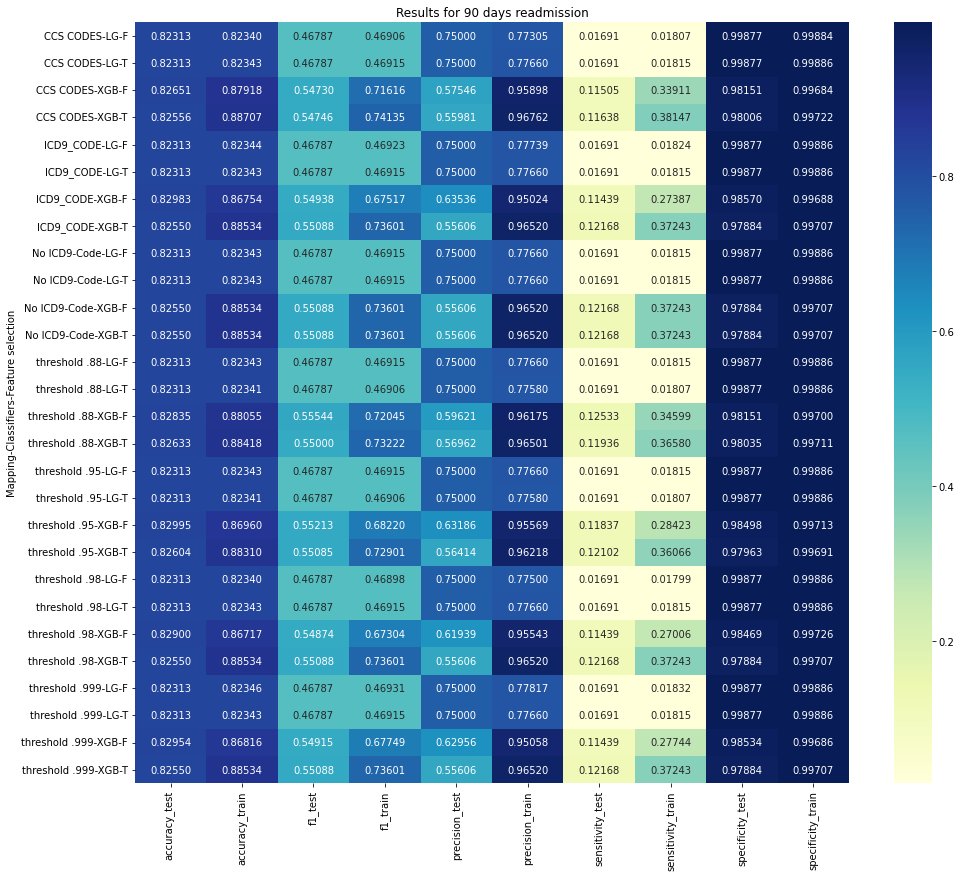

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.DataFrame(data)

# Pivot the DataFrame for the heatmap
pivot_df = df.pivot_table(index=['Mapping', 'Classifiers','Feature selection'], values=[ 'sensitivity_test', 'specificity_test','precision_test', 'accuracy_test',
        'f1_test', 'f1_train', 'sensitivity_train',
       'specificity_train', 'precision_train', 'accuracy_train',])


plt.figure(figsize=(16, 14))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt=".5f")
plt.title('Results for '+days+' days readmission')
plt.savefig("./images/metrics"+days+".png")
plt.show()

In [101]:
df_metric["Feature selection"].unique()

array(['T', 'F'], dtype=object)

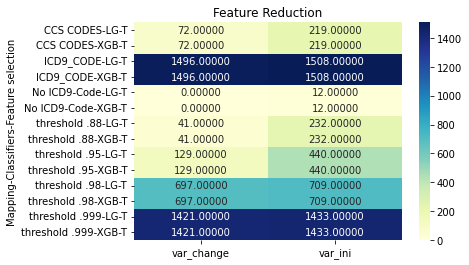

In [115]:


df = df_metric[df_metric["Feature selection"]=='T']

# Pivot the DataFrame for the heatmap
pivot_df = df.pivot_table(index=['Mapping', 'Classifiers','Feature selection'], values=[ 'var_change','var_ini'])


plt.figure(figsize=(6, 4))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt=".5f")
plt.title('Feature Reduction')
plt.savefig("./images/metrics"+days+".png")
plt.show()

In [27]:
df.head()

,Unnamed: 0,f1_test,f1_train,sensitivity_test,specificity_test,precision_test,accuracy_test,sensitivity_train,specificity_train,precision_train,accuracy_train,confusion matrix,Sampling,Feature selection,Classifiers,Mapping,Concat_name
0,0,0.502073,0.509306,0.106694,0.960017,0.519038,0.714294,0.115088,0.960746,0.542476,0.717230,[[11525 480]\n [ 4337 518]],n,T,LG,threshold .98,threshold .98LG
1,1,0.502037,0.508979,0.106694,0.959933,0.518519,0.714235,0.114779,0.960579,0.540757,0.717023,[[11524 481]\n [ 4337 518]],n,F,LG,threshold .98,threshold .98LG
2,2,0.502073,0.509306,0.106694,0.960017,0.519038,0.714294,0.115088,0.960746,0.542476,0.717230,[[11525 480]\n [ 4337 518]],o,T,LG,threshold .98,threshold .98LG
3,3,0.502037,0.508979,0.106694,0.959933,0.518519,0.714235,0.114779,0.960579,0.540757,0.717023,[[11524 481]\n [ 4337 518]],o,F,LG,threshold .98,threshold .98LG
4,4,0.582009,0.775215,0.243666,0.919367,0.549977,0.724792,0.513234,0.975573,0.894704,0.842438,[[11037 968]\n [ 3672 1183]],n,T,XGB,threshold .98,threshold .98XGB


In [117]:
df["Concat_name"] = df["Mapping"]+ df["Classifiers"]

/var/folders/xn/hrsr6_j92psb5bqf9kjzwv8w0000gp/T/ipykernel_76876/2258360349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Concat_name"] = df["Mapping"]+ df["Classifiers"]


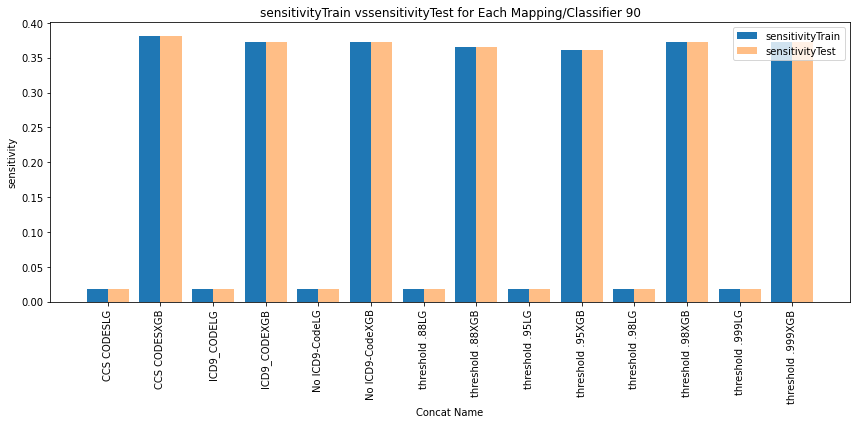

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Given DataFrame

o = "sensitivity"
#o = "specificity"
#o = "accuracy"
#o = "precision"
# Generate positions for the bars


highest_sensitivity_idx = df.groupby('Concat_name')[o+'_train'].idxmax()

# Filter the DataFrame with the rows having the highest sensitivity_train
highest_sensitivity_rows = df.loc[highest_sensitivity_idx]
highest_sensitivity_rows
# Bar plot
positions = range(len(highest_sensitivity_rows))
plt.figure(figsize=(12, 6))
plt.bar(positions, highest_sensitivity_rows[o+'_train'], width=0.4, label=o+"Train")
plt.bar([pos + 0.4 for pos in positions], highest_sensitivity_rows[o+'_train'], width=0.4, label=o+"Test", alpha=0.5)
plt.xticks([pos + 0.2 for pos in positions], highest_sensitivity_rows["Concat_name"], rotation=90)
plt.xlabel('Concat Name')
plt.ylabel(o)
plt.title(o+'Train vs'+o+'Test for Each Mapping/Classifier ' +days)
plt.legend()
plt.tight_layout()
plt.savefig('./images/Sensitivity_Bar_Plot'+o+'.png')
plt.show()


,Unnamed: 0,f1_test,f1_train,sensitivity_test,specificity_test,precision_test,accuracy_test,sensitivity_train,specificity_train,precision_train,accuracy_train,confusion matrix,Sampling,Feature selection,Classifiers,Mapping,Concat_name
24,0,0.471081,0.484889,0.063852,0.975260,0.510708,0.712811,0.077034,0.980154,0.610862,0.720092,[[11708 297]\n [ 4545 310]],n,lasso,LG,CCS CODES,CCS CODESLG
26,2,0.503579,0.634577,0.107724,0.961516,0.530964,0.715658,0.256694,0.993232,0.938795,0.781139,[[11543 462]\n [ 4332 523]],n,lasso,XGB,CCS CODES,CCS CODESXGB
20,0,0.493399,0.573228,0.109784,0.934027,0.402264,0.696679,0.192894,0.967430,0.705461,0.744395,[[11213 792]\n [ 4322 533]],n,lasso,LG,ICD9_CODE,ICD9_CODELG
22,2,0.492989,0.593260,0.091040,0.969763,0.549068,0.716726,0.200669,0.992649,0.916941,0.764591,[[11642 363]\n [ 4413 442]],n,lasso,XGB,ICD9_CODE,ICD9_CODEXGB
0,0,0.422004,0.421890,0.006385,0.997334,0.492063,0.711981,0.006334,0.997105,0.469466,0.711803,[[11973 32]\n [ 4824 31]],n,lasso,LG,No ICD9-Code,No ICD9-CodeLG
2,2,0.486900,0.596171,0.086715,0.964015,0.493552,0.711388,0.203656,0.993753,0.929495,0.766237,[[11573 432]\n [ 4434 421]],n,lasso,XGB,No ICD9-Code,No ICD9-CodeXGB
16,0,0.480887,0.490905,0.075386,0.973761,0.537445,0.715065,0.084552,0.978446,0.613373,0.721041,[[11690 315]\n [ 4489 366]],n,lasso,LG,threshold .88,threshold .88LG
18,2,0.498301,0.647629,0.103399,0.957601,0.496538,0.711625,0.275747,0.992961,0.940629,0.786432,[[11496 509]\n [ 4353 502]],n,lasso,XGB,threshold .88,threshold .88XGB
12,0,0.488138,0.513914,0.089392,0.961433,0.483835,0.710320,0.113955,0.973095,0.631384,0.725697,[[11542 463]\n [ 4421 434]],n,lasso,LG,threshold .95,threshold .95LG
14,2,0.496702,0.606344,0.097219,0.966014,0.536364,0.715836,0.218332,0.992357,0.920339,0.769469,[[11597 408]\n [ 4383 472]],n,lasso,XGB,threshold .95,threshold .95XGB


In [241]:
highest_sensitivity_idx

Classifiers
LG     20
XGB    18
Name: sensitivity_train, dtype: int64

# changes

In [177]:
import ast
def string_list(x):
    '''funcion que se convierte una lista de string a una lista normal'''
    '''Input '["\'44\'", "\'44\'", "\'50\'", "\'193\'", "\'222\'", "\'222\'", "\'222\'"]'
    x: string as list
    Output
    list: list'''

    try:
        lista = ast.literal_eval(x)
    except:
        lista = np.nan
    return lista

In [185]:
df = pd.read_csv("./data/data_preprocess_non_filtered.csv")

df.columns

Index(['Unnamed: 0', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'GENDER', 'EXPIRE_FLAG', 'DOB', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'LOSRD', 'age', 'year_age', 'ICD9_CODE_procedures',
       'CCS CATEGORY DESCRIPTION_proc', 'CCS CODES_proc',
       'cat_threshold .95 most frequent_proc'],
      dtype='object')

In [21]:
def obtener_ghist(i,df,df1,nam_p,v,real,filtered):
    real = real
    if nam_p == "Threshold":
        #nuevo_df2_gen = desconacat_codes(df,real)
        #nuevo_df_x  = nuevo_df2_gen.copy()
        nuevo_df_x = desconacat_codes(df,"ICD9_CODE_procedures",filtered)
        nuevo_df4 = desconacat_codes(df1,real,filtered)
        #print(nuevo_df2_gen.SUBJECT_ID.nunique())
        
        
    else:
        #nuevo_df2_gen = desconacat_codes(df,real)
        #nuevo_df_x  = nuevo_df2_gen.copy()
        nuevo_df_x = desconacat_codes(df,"ICD9_CODE_procedures",filtered)
        nuevo_df4 = desconacat_codes(df,real,filtered)
      

        #print(nuevo_df2_gen.SUBJECT_ID.nunique())
    nuevo_df_x = nuevo_df_x.sort_values(by=["SUBJECT_ID","HADM_ID"])
    nuevo_df4 = nuevo_df4.sort_values(by=["SUBJECT_ID","HADM_ID"])
    
    duplicados = pd.concat([nuevo_df4.reset_index(), nuevo_df_x["ICD9_CODE_procedures"]],axis = 1)
    #merged_df = pd.merge(nuevo_df4, nuevo_df_x, on=["SUBJECT_ID","HADM_ID"], how='left')

    #duplicados = pd.merge(nuevo_df_x.reset_index(),nuevo_df4.reset_index(), on=["SUBJECT_ID","HADM_ID",], how='left')
    #realizar una fFUNCION QUE ME AYUDE A LIMPIAR PREPROCESINGG DE real preprocess porque corata 30% de datos
    nuevo_df4[real +'_preprocess']= nuevo_df4[real +'_preprocess'].replace("Otro", -1)
    duplicados[real +'_preprocess']= duplicados[real +'_preprocess'].replace("Otro", -1)
    duplicados['ICD9_CODE_procedures']= duplicados['ICD9_CODE_procedures'].replace("Otro", -1)
    
    if real == "cat_threshold .95 most frequent_proc":
        name = name2 = real
        
        duplicados[name2 + "_preprocess"] = duplicados[name2 + "_preprocess"].apply(lambda x: pd.to_numeric(x, errors='coerce'))
        duplicados = duplicados[duplicados[name2 + "_preprocess"].notnull()]

    elif real == "CCS CODES_proc":
        name = real 
        duplicados[name + "_preprocess"]=[item.replace("'", '') for item in duplicados["CCS CODES_proc_preprocess"]]

        duplicados[name + "_preprocess"] = duplicados[name + "_preprocess"].apply(lambda x: pd.to_numeric(x, errors='coerce'))
        duplicados = duplicados[duplicados[name + "_preprocess"].notnull()]

   
    elif nam_p == 'Threshold':
        name2 = real
            
        duplicados[name2 + "_preprocess"] = duplicados[name2 + "_preprocess"].apply(lambda x: pd.to_numeric(x, errors='coerce'))
        duplicados = duplicados[duplicados[name2 + "_preprocess"].notnull()]

  

    
      

  
    return    duplicados

In [ ]:
obtener_ghist(i,df,df1,nam_p,v,real,filtered)

In [1]:

%load_ext autoreload
%autoreload 2
from function_mapping import *

df = pd.read_csv("./data/data_preprocess_non_filtered.csv")
pd.set_option('display.max_columns', None)

#Lectures of dataframe that have the procedures icd-9 codes with different threshold
proc = pd.read_csv("./data/procedures_preprocess_threshold_nonfiltered.csv")
grouped = proc.groupby(['SUBJECT_ID', 'HADM_ID']).agg(lambda x: x.tolist())

# Reset
# the index to make 'SUBJECT_ID' and 'HADM_ID' regular columns
grouped_proc = grouped.reset_index()
df1=grouped_proc.copy()

list_cat = ['CCS CODES_proc', 'cat_threshold .95 most frequent_proc','cat_threshold .88 most frequent', 'cat_threshold .98 most frequent',
              'cat_threshold .999 most frequent']

categorical_cols = ['ADMISSION_TYPE', 'ADMISSION_LOCATION',
              'DISCHARGE_LOCATION', 'INSURANCE',  'RELIGION',
              'MARITAL_STATUS', 'ETHNICITY','GENDER']


nam_p_list = ['CCS CODES_proc', 'cat_threshold .95 most frequent_proc','Threshold', 'Threshold',
       'Threshold']

filtered = True
v = "patient" 


result_stat  = {'Name' : [],
       'count': [],
'mean': [],
'std': [],
'min': [],
'25%': [],
'50%': [],
'75%': [],
'max': [] ,
"Min >":[],
"Unique_codes":[],
"Unique_codes_icd9":[]}

for i in range(len(list_cat)):
       nam_p = nam_p_list[i]
       real = list_cat[i]
       changes_per_patient,real,unique_icd9 ,unique_r = calculare_changes(i,df,df1,nam_p,v,real,filtered)
       auc_d = create_results(result_stat,changes_per_patient,real,unique_r,unique_icd9)

       for key in auc_d:
           result_stat[key].append(auc_d[key])
       

df_res = pd.DataFrame(result_stat)
df_res.to_csv("./results_changes/"+v+"_nonfiltered.csv")

KeyboardInterrupt: 

In [204]:
df.HADM_ID.nunique()

58976

In [198]:


df_res.to_csv("./results_changes/"+v+"_nonfiltered.csv")

In [179]:
nuevo_df2_gen.head()

,SUBJECT_ID,HADM_ID,ICD9_CODE_procedures
0,22,165315,9671
1,22,165315,9604
2,22,165315,9634
3,23,152223,3613
4,23,152223,3615


In [ ]:
# visit level*

In [36]:
archivo = "visit_nonfiltered.csv"
ruta = "./results_changes/"
cpatient = pd.read_csv(ruta+archivo)

cpatient["% Codes"] = cpatient["Unique_codes"]/cpatient["Unique_codes_icd9"]
cpatient = cpatient.rename(columns ={"Unnamed: 3":'% Change'} )
cpatient["% Change"] = cpatient["count"]/52243.0

cpatient["Name"] = cpatient["Name"].replace('CODES_proc', 'CCS CODES')
cpatient["Name"] = cpatient["Name"].replace('cat_threshold .95 most frequent_proc', 'threshold .95')
cpatient["Name"] = cpatient["Name"].replace('cat_threshold .88 most frequent', 'threshold .88')
cpatient["Name"] = cpatient["Name"].replace('cat_threshold .999 most frequent', 'threshold .999')
cpatient["Name"] = cpatient["Name"].replace('cat_threshold .98 most frequent', 'threshold .98')
cpatient.columns


Index(['Unnamed: 0', 'Name', 'count', 'mean', 'std', 'min', '25%', '50%',
       '75%', 'max', 'Min >', 'Unique_codes', 'Unique_codes_icd9', '% Codes',
       '% Change'],
      dtype='object')

In [226]:
cpatient

,Unnamed: 0,Name,count,mean,std,min,25%,50%,75%,max,Min >,Unique_codes,Unique_codes_icd9,% Codes,% Change
0,0,CCS CODES_proc,42214.0,5.686194,5.620025,1.0,2.0,4.0,7.0,98.0,1.0,221,2009,0.110005,0.808032
1,1,threshold .95,7449.0,1.616459,1.216452,1.0,1.0,1.0,2.0,26.0,1.0,444,2009,0.221005,0.142584
2,2,threshold .88,13905.0,2.080403,1.773861,1.0,1.0,1.0,2.0,37.0,1.0,216,2009,0.107516,0.266160
3,3,threshold .98,3425.0,1.403796,0.898231,1.0,1.0,1.0,1.0,10.0,1.0,752,2009,0.374316,0.065559
4,4,threshold .999,229.0,1.052402,0.223324,1.0,1.0,1.0,1.0,2.0,1.0,1773,2009,0.882529,0.004383


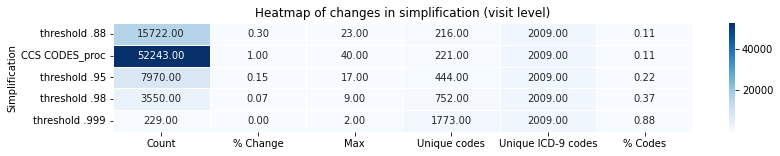

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

df = cpatient[['Name', 'count', '% Change', 'max', 'Unique_codes', 'Unique_codes_icd9', '% Codes']].sort_values(by="Unique_codes")

df = df.rename(columns={"Unique_codes": 'Unique codes', "Unique_codes_icd9": 'Unique ICD-9 codes', "max": 'Max', "count": 'Count'})
# Set 'Name' column as index
df.set_index('Name', inplace=True)

# Create a custom color palette with different shades of blue
cmap = sns.color_palette("Blues", as_cmap=True)

# Create a heatmap
plt.figure(figsize=(13, 2))
sns.heatmap(df, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
plt.title('Heatmap of changes in simplification (visit level)')

# Modify the y-axis label name
plt.ylabel('Simplification')

plt.show()

# Visit

In [39]:
archivo = "patient_nonfiltered.csv"
ruta = "./results_changes/"
cpatient = pd.read_csv(ruta+archivo)

cpatient["% Codes"] = cpatient["Unique_codes"]/cpatient["Unique_codes_icd9"]
cpatient = cpatient.rename(columns ={"change":'% Change'} )
cpatient["% Change"] = cpatient["count"]/42214.0

cpatient["Name"] = cpatient["Name"].replace('CODES_proc', 'CCS CODES')
cpatient["Name"] = cpatient["Name"].replace('cat_threshold .95 most frequent_proc', 'threshold .95')
cpatient["Name"] = cpatient["Name"].replace('cat_threshold .88 most frequent', 'threshold .88')
cpatient["Name"] = cpatient["Name"].replace('cat_threshold .999 most frequent', 'threshold .999')
cpatient["Name"] = cpatient["Name"].replace('cat_threshold .98 most frequent', 'threshold .98')
cpatient.columns


Index(['Unnamed: 0', 'Name', 'count', 'mean', 'std', 'min', '25%', '50%',
       '75%', 'max', 'Min >', 'Unique_codes', 'Unique_codes_icd9', '% Codes',
       '% Change'],
      dtype='object')

In [222]:
cpatient

,Unnamed: 0,Name,count,mean,std,min,25%,50%,75%,max,Min >,Unique_codes,Unique_codes_icd9,% Codes,% Change
0,0,CCS CODES_proc,42214.0,5.686194,5.620025,1.0,2.0,4.0,7.0,98.0,1.0,221,2009,0.110005,1.000000
1,1,threshold .95,7449.0,1.616459,1.216452,1.0,1.0,1.0,2.0,26.0,1.0,444,2009,0.221005,0.176458
2,2,threshold .88,13905.0,2.080403,1.773861,1.0,1.0,1.0,2.0,37.0,1.0,216,2009,0.107516,0.329393
3,3,threshold .98,3425.0,1.403796,0.898231,1.0,1.0,1.0,1.0,10.0,1.0,752,2009,0.374316,0.081134
4,4,threshold .999,229.0,1.052402,0.223324,1.0,1.0,1.0,1.0,2.0,1.0,1773,2009,0.882529,0.005425


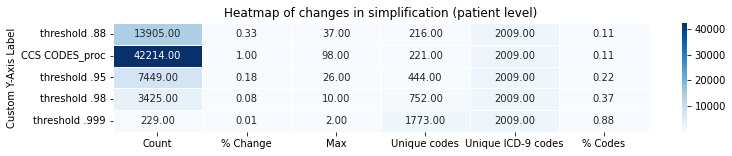

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = cpatient[['Name', 'count', '% Change', 'max', 'Unique_codes', 'Unique_codes_icd9', '% Codes']].sort_values(by="Unique_codes")

df1 = df1.rename(columns={"Unique_codes": 'Unique codes', "Unique_codes_icd9": 'Unique ICD-9 codes', "max": 'Max', "count": 'Count'})
# Set 'Name' column as index
df1.set_index('Name', inplace=True)

# Create a custom color palette with shades of blue
cmap = sns.color_palette("Blues", as_cmap=True)

# Create a heatmap
plt.figure(figsize=(12, 2))
sns.heatmap(df1, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
plt.title('Heatmap of changes in simplification (patient level)')


# Modify the y-axis label
plt.ylabel('Custom Y-Axis Label')

plt.show()


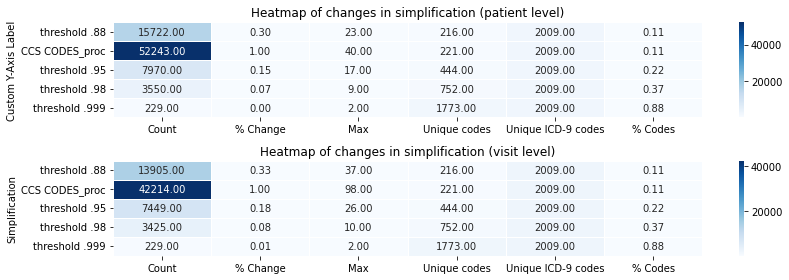

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a custom color palette with shades of blue
cmap = sns.color_palette("Blues", as_cmap=True)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=2, figsize=(12, 4))

# First Heatmap
sns.heatmap(df, annot=True, cmap=cmap, fmt=".2f", linewidths=.5, ax=axes[0])
axes[0].set_title('Heatmap of changes in simplification (patient level)')
axes[0].set_ylabel('Custom Y-Axis Label')

# Second Heatmap
sns.heatmap(df1, annot=True, cmap=cmap, fmt=".2f", linewidths=.5, ax=axes[1])
axes[1].set_title('Heatmap of changes in simplification (visit level)')
axes[1].set_ylabel('Simplification')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Mutual information

In [138]:
directory_path = './models_cluster/'
mi_pa = pd.read_csv(directory_path+'output_mi_patient.csv')
mi_pa1 = pd.read_csv(directory_path+'output_vi.csv')
mi_pa = pd.DataFrame(mi_pa.values ,columns=['Column1', 'Column2', 'MI','RI'])
mi_pa1 = pd.DataFrame(mi_pa1.values ,columns=['Column1', 'Column2', 'MI_vi','RI_vi'])


In [139]:
mi_pa["Column1"] = mi_pa["Column1"].replace('CCS CODES_proc_outs_visit_non_filtered.csv', 'CCS CODES')
mi_pa["Column1"] = mi_pa["Column1"].replace('ICD9_CODE_procedures_outs_visit_non_filtered.csv', 'ICD-9 CODES')
mi_pa["Column2"] = mi_pa["Column2"].replace('CCS CODES_proc_outs_visit_non_filtered.csv', 'CCS CODES')
mi_pa["Column2"] = mi_pa["Column2"].replace('ICD9_CODE_procedures_outs_visit_non_filtered.csv', 'ICD-9 CODES')

mi_pa["Column1"] = mi_pa["Column1"].replace('cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv', 'threshold .95')
mi_pa["Column1"] = mi_pa["Column1"].replace('cat_threshold .88 most frequent_outs_visit_non_filtered.csv', 'threshold .88')
mi_pa["Column1"] = mi_pa["Column1"].replace('cat_threshold .999 most frequent_outs_visit_non_filtered.csv', 'threshold .999')
mi_pa["Column1"] = mi_pa["Column1"].replace('cat_threshold .98 most frequent_outs_visit_non_filtered.csv', 'threshold .98')
mi_pa["Column1"] = mi_pa["Column1"].replace('sin_codigo_non_filtered.csv', 'No ICD9-Codes')
mi_pa["Column2"] = mi_pa["Column2"].replace('sin_codigo_non_filtered.csv', 'No ICD9-Codes')
mi_pa["Column2"] = mi_pa["Column2"].replace('cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv', 'threshold .95')
mi_pa["Column2"] = mi_pa["Column2"].replace('cat_threshold .88 most frequent_outs_visit_non_filtered.csv', 'threshold .88')
mi_pa["Column2"] = mi_pa["Column2"].replace('cat_threshold .999 most frequent_outs_visit_non_filtered.csv', 'threshold .999')
mi_pa["Column2"] = mi_pa["Column2"].replace('cat_threshold .98 most frequent_outs_visit_non_filtered.csv', 'threshold .98')


In [140]:
mi_pa1["Column1"] = mi_pa1["Column1"].replace('CCS CODES_proc_outs_visit_non_filtered.csv', 'CCS CODES')
mi_pa1["Column1"] = mi_pa1["Column1"].replace('ICD9_CODE_procedures_outs_visit_non_filtered.csv', 'ICD-9 CODES')
mi_pa1["Column2"] = mi_pa1["Column2"].replace('CCS CODES_proc_outs_visit_non_filtered.csv', 'CCS CODES')
mi_pa1["Column2"] = mi_pa1["Column2"].replace('ICD9_CODE_procedures_outs_visit_non_filtered.csv', 'ICD-9 CODES')

mi_pa1["Column1"] = mi_pa1["Column1"].replace('cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv', 'threshold .95')
mi_pa1["Column1"] = mi_pa1["Column1"].replace('cat_threshold .88 most frequent_outs_visit_non_filtered.csv', 'threshold .88')
mi_pa1["Column1"] = mi_pa1["Column1"].replace('cat_threshold .999 most frequent_outs_visit_non_filtered.csv', 'threshold .999')
mi_pa1["Column1"] = mi_pa1["Column1"].replace('cat_threshold .98 most frequent_outs_visit_non_filtered.csv', 'threshold .98')
mi_pa1["Column1"] = mi_pa1["Column1"].replace('sin_codigo_non_filtered.csv', 'No ICD9-Codes')
mi_pa1["Column2"] = mi_pa1["Column2"].replace('sin_codigo_non_filtered.csv', 'No ICD9-Codes')
mi_pa1["Column2"] = mi_pa1["Column2"].replace('cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv', 'threshold .95')
mi_pa1["Column2"] = mi_pa1["Column2"].replace('cat_threshold .88 most frequent_outs_visit_non_filtered.csv', 'threshold .88')
mi_pa1["Column2"] = mi_pa1["Column2"].replace('cat_threshold .999 most frequent_outs_visit_non_filtered.csv', 'threshold .999')
mi_pa1["Column2"] = mi_pa1["Column2"].replace('cat_threshold .98 most frequent_outs_visit_non_filtered.csv', 'threshold .98')


In [141]:
mi_pa["Column2"].unique()

array(['threshold .95', 'threshold .999', 'threshold .98',
       'No ICD9-Codes', 'CCS CODES', 'ICD-9 CODES', 'threshold .88'],
      dtype=object)

In [148]:
mi_pa = mi_pa.fillna(.999)
mi_pa1 = mi_pa1.fillna(.98)

In [142]:
mi_pa1["Column1"].unique()

array(['threshold .88', 'threshold .95', 'threshold .999',
       'threshold .98', 'No ICD9-Codes', 'CCS CODES', 'ICD-9 CODES'],
      dtype=object)

In [143]:
mi_pa1["Column2"].unique()

array(['threshold .95', 'threshold .999', 'threshold .98',
       'No ICD9-Codes', 'CCS CODES', 'ICD-9 CODES', 'threshold .88'],
      dtype=object)

In [94]:
pivot_df1.dtypes

Column1
CCS CODES_proc_outs_visit_non_filtered.csv                          object
ICD9_CODE_procedures_outs_visit_non_filtered.csv                    object
cat_threshold .88 most frequent_outs_visit_non_filtered.csv         object
cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv    object
cat_threshold .98 most frequent_outs_visit_non_filtered.csv         object
cat_threshold .999 most frequent_outs_visit_non_filtered.csv        object
sin_codigo_non_filtered.csv                                         object
dtype: object

In [166]:
pivot_df1 =  pivot_df1.replace('NaN', .984)
pivot_df1['threshold .88'] = pivot_df1['threshold .88'].fillna(.984)
pivot_df1.isnull()

pivot_df1.isnull()

Column1,CCS CODES,ICD-9 CODES,No ICD9-Codes,threshold .88,threshold .95,threshold .98,threshold .999
Column2,,,,,,,
CCS CODES,False,False,False,False,False,False,False
ICD-9 CODES,False,False,False,False,False,False,False
No ICD9-Codes,False,False,False,False,False,False,False
threshold .88,False,False,False,False,False,False,False
threshold .95,False,False,False,False,False,False,False
threshold .98,False,False,False,False,False,False,False
threshold .999,False,False,False,False,False,False,False


In [163]:
pivot_df1


Column1,CCS CODES,ICD-9 CODES,No ICD9-Codes,threshold .88,threshold .95,threshold .98,threshold .999
Column2,,,,,,,
CCS CODES,1.000,0.377,0.741,0.994,0.993,0.412,0.404
ICD-9 CODES,0.377,0.980,0.387,0.381,0.381,0.769,0.835
No ICD9-Codes,0.741,0.387,0.800,0.741,0.741,0.426,0.424
threshold .88,0.994,0.381,0.741,NaN,1.000,0.415,0.407
threshold .95,0.993,0.381,0.741,1.000,1.000,0.415,0.407
threshold .98,0.412,0.769,0.426,0.415,0.415,0.810,0.718
threshold .999,0.404,0.835,0.424,0.407,0.407,0.718,0.816


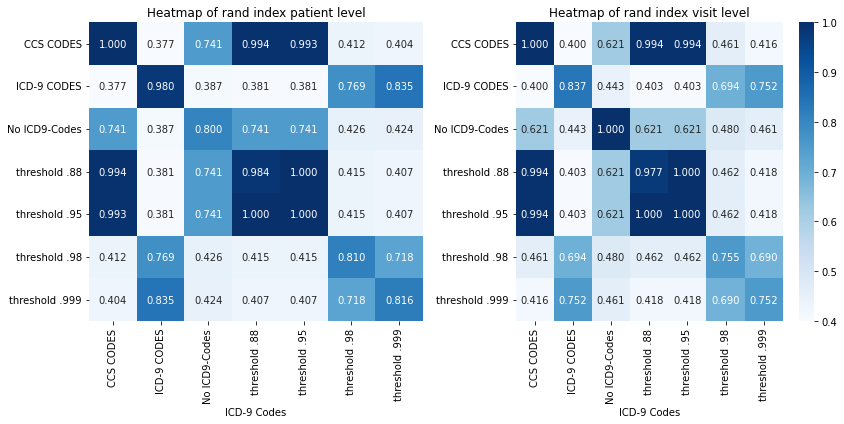

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the columns 'Column1', 'Column2', 'MI', and 'RI'

# Reshape the DataFrame using pivot
pivot_df1 = mi_pa.pivot(index='Column2', columns='Column1', values='RI')
pivot_df2 = mi_pa1.pivot(index='Column2', columns='Column1', values='RI_vi')
pivot_df1['threshold .88'] = pivot_df1['threshold .88'].fillna(.984)
pivot_df2['threshold .88'] = pivot_df2['threshold .88'].fillna(.9774)

pivot_df1 = pivot_df1.astype(float)
pivot_df1 = pivot_df1.round(3)
pivot_df2 = pivot_df2.astype(float)
pivot_df2 = pivot_df2.round(3)
# Create the first subplot for the first heatmap
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)


sns.heatmap(pivot_df1, cmap='Blues', annot=True, fmt=".3f", cbar=False)
plt.xlabel('ICD-9 Codes')
plt.ylabel('')
plt.title('Heatmap of rand index patient level')

# Create the second subplot for the second heatmap
plt.subplot(1, 2, 2)
sns.heatmap(pivot_df2, cmap='Blues', annot=True, fmt=".3f")
plt.xlabel('ICD-9 Codes')
plt.ylabel('')
plt.title('Heatmap of rand index visit level')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

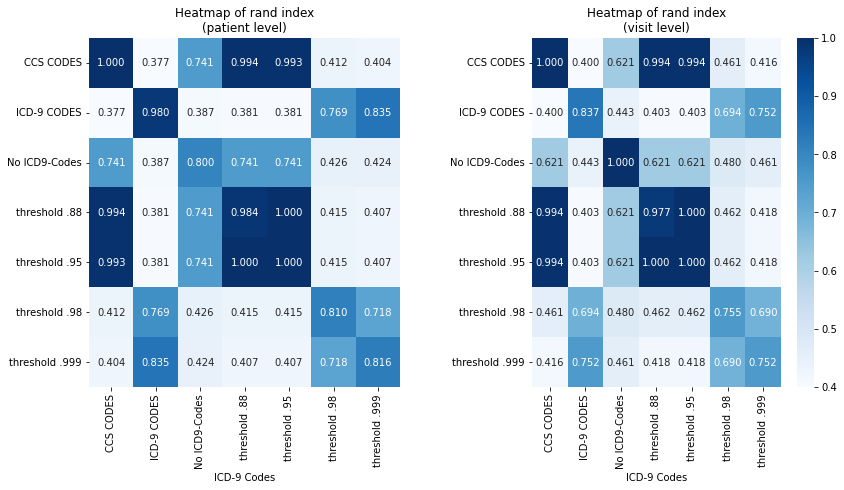

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the columns 'Column1', 'Column2', 'MI', and 'RI'

# Reshape the DataFrame using pivot
pivot_df1 = mi_pa.pivot(index='Column2', columns='Column1', values='RI')
pivot_df2 = mi_pa1.pivot(index='Column2', columns='Column1', values='RI_vi')
pivot_df1['threshold .88'] = pivot_df1['threshold .88'].fillna(.984)
pivot_df2['threshold .88'] = pivot_df2['threshold .88'].fillna(.9774)

pivot_df1 = pivot_df1.astype(float)
pivot_df1 = pivot_df1.round(3)
pivot_df2 = pivot_df2.astype(float)
pivot_df2 = pivot_df2.round(3)

# Create the first subplot for the first heatmap
plt.figure(figsize=(13, 8))
plt.subplot(1, 2, 1)

sns.heatmap(pivot_df1, cmap='Blues', annot=True, fmt=".3f", cbar=False)
plt.xlabel('ICD-9 Codes')
plt.ylabel('')
plt.title('Heatmap of rand index\n(patient level)')  # Add a line break for spacing in the title

# Create the second subplot for the second heatmap
plt.subplot(1, 2, 2)
sns.heatmap(pivot_df2, cmap='Blues', annot=True, fmt=".3f")
plt.xlabel('ICD-9 Codes')
plt.ylabel('')
plt.title('Heatmap of rand index\n(visit level)')  # Add a line break for spacing in the title

# Adjust the spacing between subplots and increase spacing between graphs
plt.tight_layout(pad=5.0)  # Increase the pad value for more spacing

# Show the plot
plt.show()

# Demographics

In [2]:
archivo_input_label = 'data_preprocess_non_filtered.csv'
df  = pd.read_csv('./data/'+archivo_input_label)
df.shape

(58976, 25)

In [ ]:
df  = pd.read_csv('./data/'+archivo_input_label)

In [3]:
adm = pd.read_csv('/Users/cgarciay/Desktop/Laval_Master_Computer/research/MIMIC/ADMISSIONS.csv.gz')

In [11]:


new_column_names = {'ADMISSION_TYPE': 'Admission type', 'ADMISSION_LOCATION': 'Admission location', 'DISCHARGE_LOCATION': 'Discharge location',
                    'INSURANCE': 'Insurance', 'LANGUAGE': 'Language', 'RELIGION': 'Religion', 'MARITAL_STATUS': 'Marital status',   'ETHNICITY':'Ethnicity',     'HOSPITAL_EXPIRE_FLAG':'Death', 'HAS_CHARTEVENTS_DATA':'Has Chart Events'}

adm = adm.rename(columns=new_column_names)


In [12]:

adm["Death"] = np.where(adm["Death"]==1, 'Died', 'Survived')


In [91]:
adm.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'Admission type', 'Admission location',
       'Discharge location', 'Insurance', 'Language', 'Religion',
       'Marital status', 'Ethnicity', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'Death', 'Has Chart Events'],
      dtype='object')

In [87]:
adm.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'Admission type', 'Admission location',
       'Discharge location', 'Insurance', 'Language', 'Religion',
       'Marital status', 'Ethnicity', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'Death', 'Has Chart Events'],
      dtype='object')

In [13]:
adm["Death"].value_counts()
adm['Has Chart Events'] = np.where(adm['Has Chart Events']==1, 'Yes', 'No')

In [123]:
adm.drop_duplicates().shape

(58976, 19)

In [122]:
adm.ADMITTIME.nunique()

58651

In [14]:
adm["Ethnicity"].value_counts()
adm["Death"].value_counts()
adm["Ethnicity"] = np.where(adm["Ethnicity"]=='BLACK/AFRICAN AMERICAN', 'AFRICAN AMERICAN', adm["Ethnicity"])

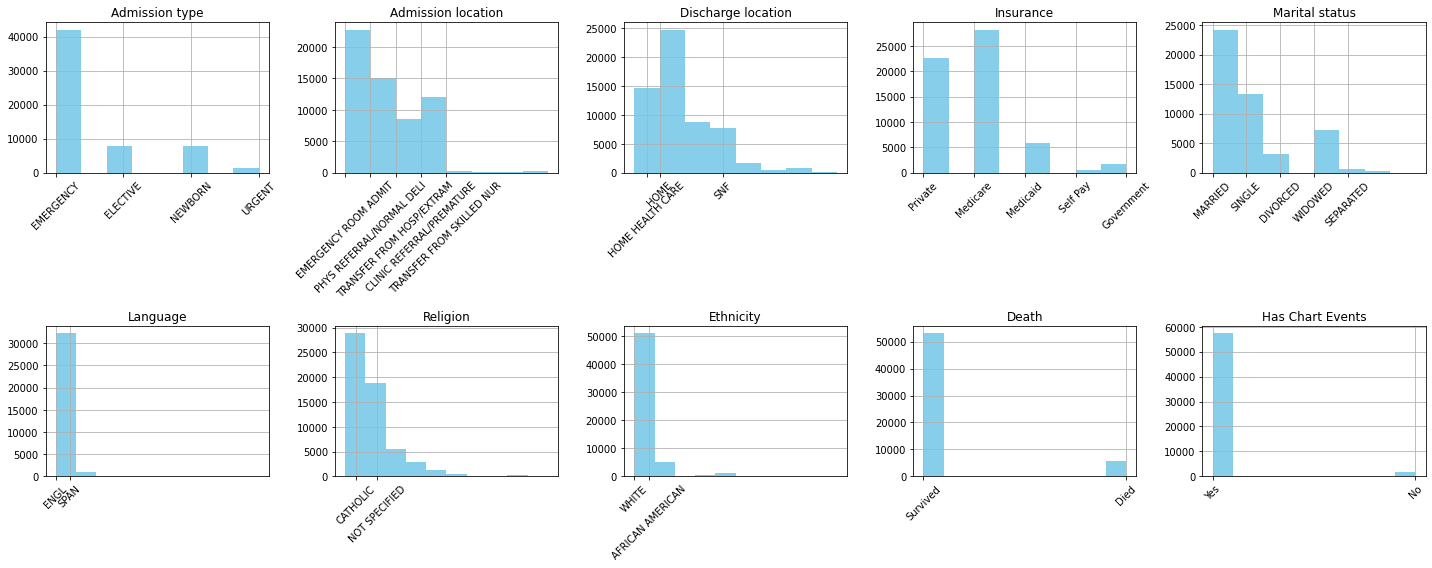

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'adm' is the DataFrame containing the data
# and 'columns' is the list of column names

# Select the top 5 and bottom 5 columns
top_columns = ['Admission type', 'Admission location',
               'Discharge location', 'Insurance', 'Marital status',]
bottom_columns = ['Language','Religion',  'Ethnicity', 'Death', 'Has Chart Events']

# Create subplots for the histograms
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Plot histograms for the top columns
for i, column in enumerate(top_columns):
    ax = axes[0, i]
    adm[column].hist(ax=ax, bins=8, color='skyblue')  # Change the color to 'skyblue'
    ax.set_title(column)
    # Get the 5 most common categories
    if column == "Discharge location":
        top_categories = adm[column].value_counts().head(3)
    else:
        top_categories = adm[column].value_counts().head(5)
    # Set the x-axis labels to the top categories
    ax.set_xticks(top_categories.index)
    ax.set_xticklabels(top_categories.index, rotation=45)

# Plot histograms for the bottom columns
for i, column in enumerate(bottom_columns):
    ax = axes[1, i]
    adm[column].hist(ax=ax, bins=10, color='skyblue')  # Change the color to 'deepskyblue'
    ax.set_title(column)
    # Get the 5 most common categories
    top_categories = adm[column].value_counts().head(2)
    # Set the x-axis labels to the top categories
    ax.set_xticks(top_categories.index)
    ax.set_xticklabels(top_categories.index, rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the histograms
plt.show()

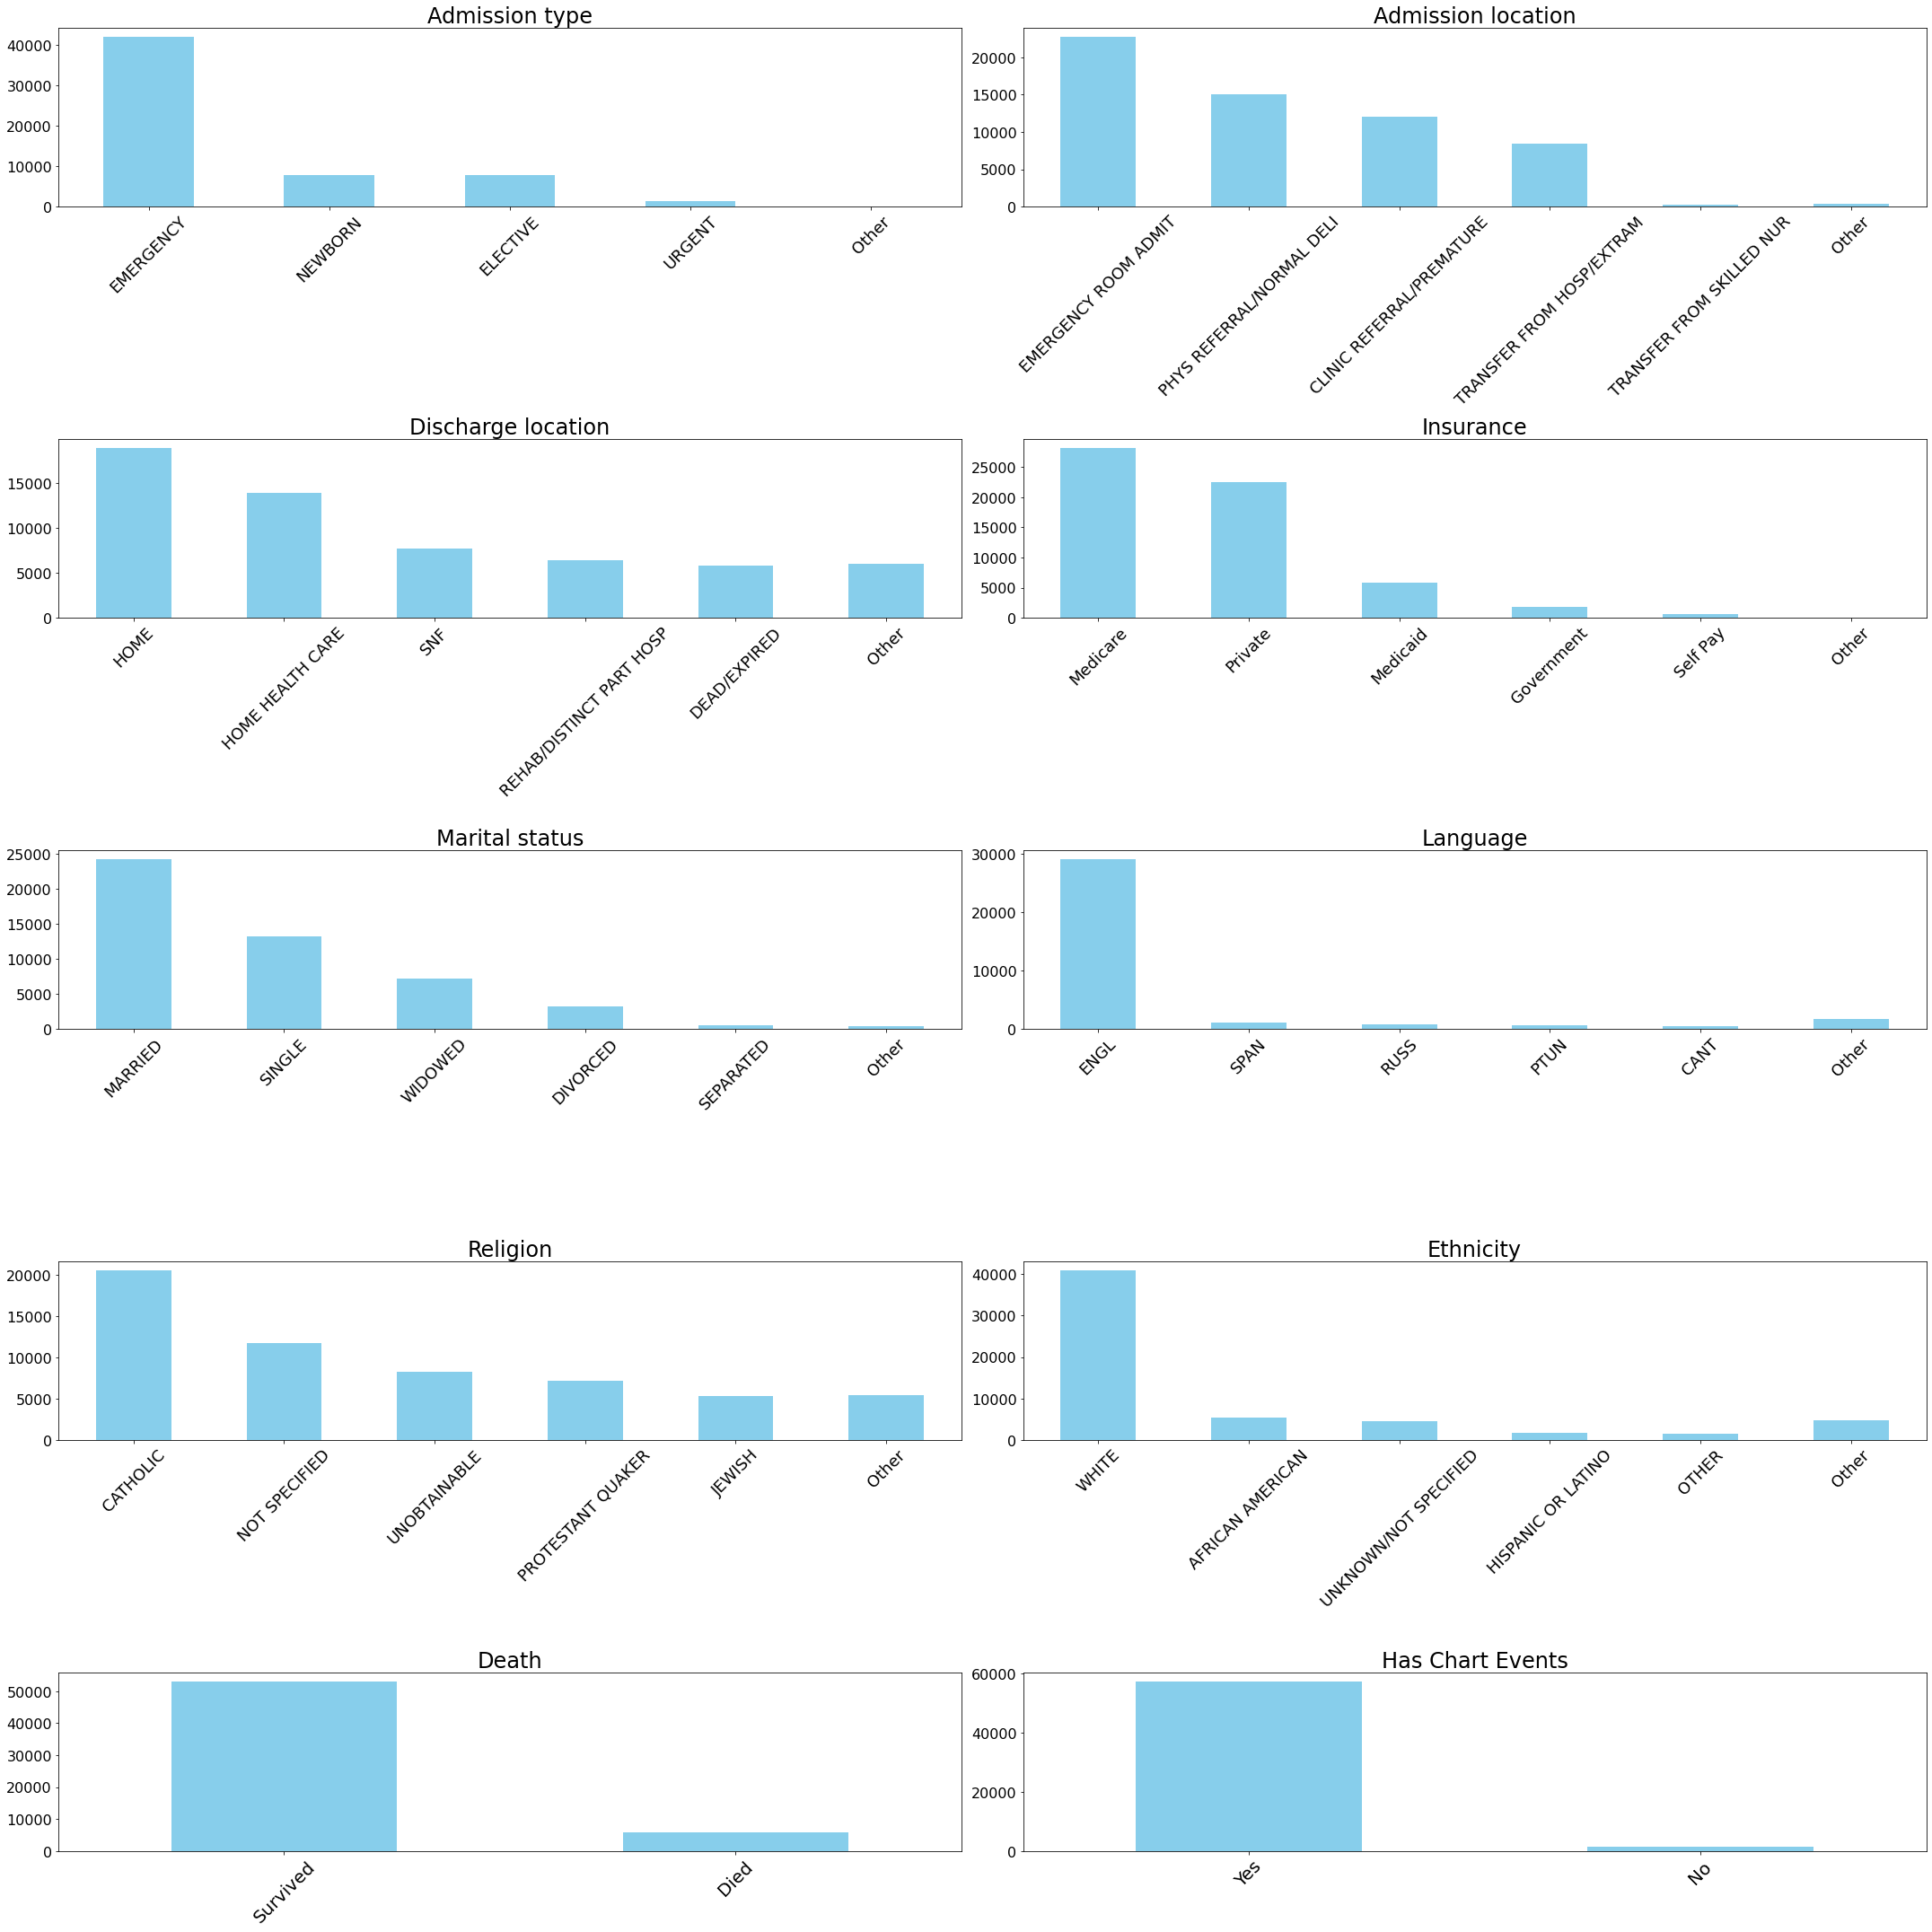

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

top_columns = ['Admission type', 'Admission location',
               'Discharge location', 'Insurance', 'Marital status',]
bottom_columns = ['Language','Religion',  'Ethnicity', 'Death', 'Has Chart Events']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))

for i, column in enumerate(top_columns+bottom_columns):
    if column in ['Death', 'Has Chart Events']:
        ax = axes[i // 2, i % 2]
        top_categories = adm[column].value_counts()
        top_categories.plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(column, fontsize=24)
        ax.set_xticklabels(top_categories.index, rotation=45, fontsize=20)
        ax.tick_params(axis='y', labelsize=16)
    else:
        ax = axes[i // 2, i % 2]
        value_counts = adm[column].value_counts()
        top_categories = value_counts.head(5)
        other_count = value_counts.sum() - top_categories.sum()
        categories = top_categories.append(pd.Series([other_count], index=["Other"]))
        categories.plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(column, fontsize=24)
        ax.set_xticklabels(categories.index, rotation=45, fontsize=18)
        ax.tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.show()

In [ ]:
[ 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY',  
       'GENDER', 'EXPIRE_FLAG',]]

In [8]:
df['age'].describe()

count       58976
unique      20337
top       0:00:00
freq         7840
Name: age, dtype: object

In [43]:
import pandas as pd

# Assuming 'df' is the DataFrame containing the data

# Get the name of all columns
column_names = adm.columns.tolist()

# Get the number of categories in each column
num_categories = [adm[column].nunique() for column in column_names]

# Create a new DataFrame with the column names and number of categories
table_data = {'Column Name': column_names, 'Number of Categories': num_categories}
table_df = pd.DataFrame(table_data)

# Display the table
print(table_df)

           Column Name  Number of Categories
0               ROW_ID                 58976
1           SUBJECT_ID                 46520
2              HADM_ID                 58976
3            ADMITTIME                 58651
4            DISCHTIME                 58657
5            DEATHTIME                  5834
6       Admission type                     4
7   Admission location                     9
8   Discharge location                    17
9            Insurance                     5
10            Language                    75
11            Religion                    20
12      Marital status                     7
13           Ethnicity                    41
14           EDREGTIME                 30874
15           EDOUTTIME                 30864
16           DIAGNOSIS                 15691
17               Death                     2
18    Has Chart Events                     2


In [44]:
adm.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'Admission type', 'Admission location',
       'Discharge location', 'Insurance', 'Language', 'Religion',
       'Marital status', 'Ethnicity', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'Death', 'Has Chart Events'],
      dtype='object')

In [3]:
bins = [0, 18, 30, 40, 50, 60, 250]  # Define the age intervals for bins

# Create labels for the bins
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-100']  # Labels for each bin range

# Use cut to create bins from the 'age' column
df['age_group'] = pd.cut(df['year_age'], bins=bins, labels=labels, right=False) 



#para grupo lenght of stay
bins = [-1,0, 25, 100, 400, 500, 700, 4107]  # Define the age intervals for bins

# Create labels for the bins
labels = ['0','1-25', '26-100', '101-401', '402-500', '501-700', '701-4107']  # Labels for each bin range

# Use cut to create bins from the 'age' column
df['INTERVAL_group'] = pd.cut(df['LOSRD'], bins=bins, labels=labels, right=False)  # Assign each value to a bin
# Assign each value to a bin
#df.loc[df['INTERVAL_group'].isnull(), 'INTERVAL_group'] = 0

In [10]:
df['INTERVAL_group'].unique()

['1-25', '26-100', '101-401', '0']
Categories (7, object): ['0' < '1-25' < '26-100' < '101-401' < '402-500' < '501-700' < '701-4107']

In [11]:
df['age_group'].unique()

['61-100', '31-40', '51-60', '0-18', '41-50', '19-30']
Categories (6, object): ['0-18' < '19-30' < '31-40' < '41-50' < '51-60' < '61-100']

In [12]:
df.columns

Index(['Unnamed: 0', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'GENDER', 'EXPIRE_FLAG', 'DOB', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'LOSRD', 'age', 'year_age', 'ICD9_CODE_procedures',
       'CCS CATEGORY DESCRIPTION_proc', 'CCS CODES_proc',
       'cat_threshold .95 most frequent_proc', 'age_group', 'INTERVAL_group'],
      dtype='object')

In [4]:
import pandas as pd

# Group the DataFrame by 'ADMISSION_TYPE' and calculate the mode of the variables
grouped_df = df.groupby('SUBJECT_ID')['ADMISSION_TYPE', 'INSURANCE', 'GENDER', 'EXPIRE_FLAG', 'age_group', 'INTERVAL_group'].apply(lambda x: x.mode().iloc[0])

# Print the grouped DataFrame


/var/folders/xn/hrsr6_j92psb5bqf9kjzwv8w0000gp/T/ipykernel_12439/714467749.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = df.groupby('SUBJECT_ID')['ADMISSION_TYPE', 'INSURANCE', 'GENDER', 'EXPIRE_FLAG', 'age_group', 'INTERVAL_group'].apply(lambda x: x.mode().iloc[0])


In [191]:
grouped_df['EXPIRE_FLAG'].value_counts()

SURVIVED    30761
DIED        15759
Name: EXPIRE_FLAG, dtype: int64

In [9]:
gender_map2 = {1.0: 'DIED', 0.0: 'SURVIVED'}

# Use the map function to create a new column 'gender_label'
grouped_df['EXPIRE_FLAG'] = grouped_df['EXPIRE_FLAG'].map(gender_map2)


df['EXPIRE_FLAG'] = df['EXPIRE_FLAG'].map(gender_map2)

In [10]:
df.columns

Index(['Unnamed: 0', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'GENDER', 'EXPIRE_FLAG', 'DOB', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'LOSRD', 'age', 'year_age', 'ICD9_CODE_procedures',
       'CCS CATEGORY DESCRIPTION_proc', 'CCS CODES_proc',
       'cat_threshold .95 most frequent_proc', 'age_group', 'INTERVAL_group'],
      dtype='object')

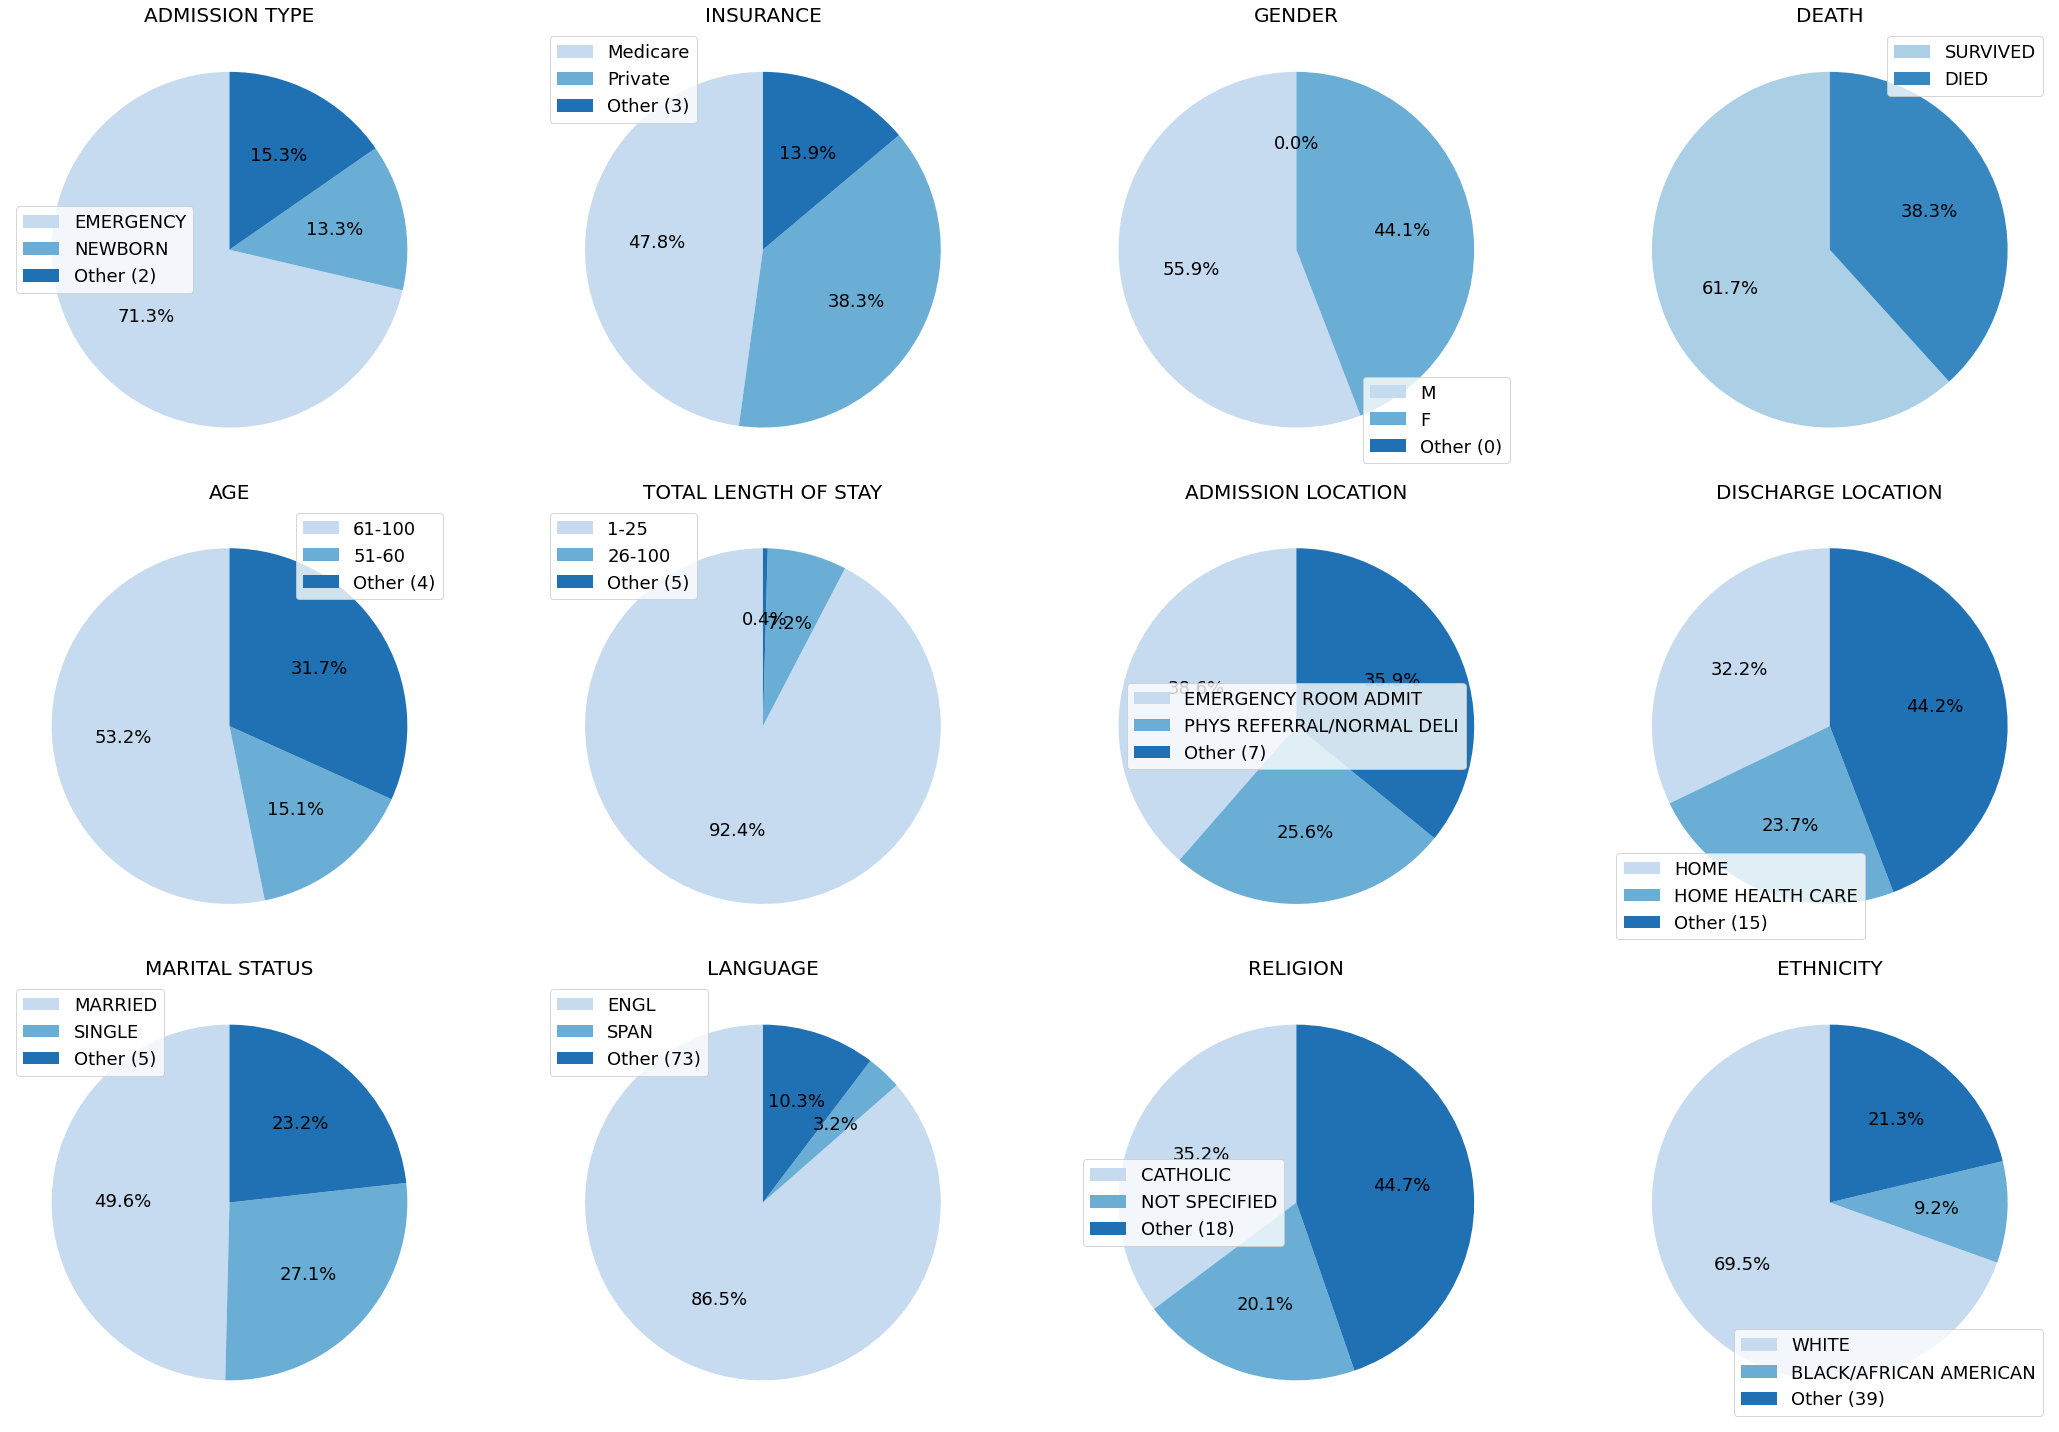

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped_df = df
variables = ['ADMISSION_TYPE', 'INSURANCE', 'GENDER', 'EXPIRE_FLAG','age_group',  'INTERVAL_group', 'ADMISSION_LOCATION','DISCHARGE_LOCATION','MARITAL_STATUS','LANGUAGE','RELIGION','ETHNICITY',]
title = ['ADMISSION TYPE', 'INSURANCE', 'GENDER', 'DEATH', 'AGE', 'TOTAL LENGTH OF STAY','ADMISSION LOCATION','DISCHARGE LOCATION','MARITAL STATUS','LANGUAGE','RELIGION','ETHNICITY',]
fig, axes = plt.subplots(3, 4, figsize=(30, 20))

fig.patch.set_facecolor('white')

axes = axes.flatten()

for i, variable in enumerate(variables):
    counts = grouped_df[variable].value_counts()
    if variable != 'EXPIRE_FLAG':  
        top_2 = counts.head(2)  
        other_count = counts.shape[0] - 2
        other_label = f'Other ({other_count:,})'
        top_2_counts = top_2.append(pd.Series([counts.sum() - top_2.sum()], index=[other_label]))
        colors = sns.color_palette('Blues', len(top_2_counts))
    else:
        top_2_counts = counts.head(2)  # Select top 2 categories for other variables
        colors = sns.color_palette('Blues', len(top_2_counts))
    
    pie = axes[i].pie(top_2_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 18}) 
    axes[i].set_title(title[i], fontsize=20)  
    axes[i].legend(pie[0], top_2_counts.index, loc='best', fontsize=18)
    axes[i].set_aspect('equal')  # Ensure pie is circular
    axes[i].set_xlabel('')  # Remove x-axis label
    axes[i].set_ylabel('')  # Remove y-axis label

plt.tight_layout()
plt.show()

IndexError: index 6 is out of bounds for axis 0 with size 6

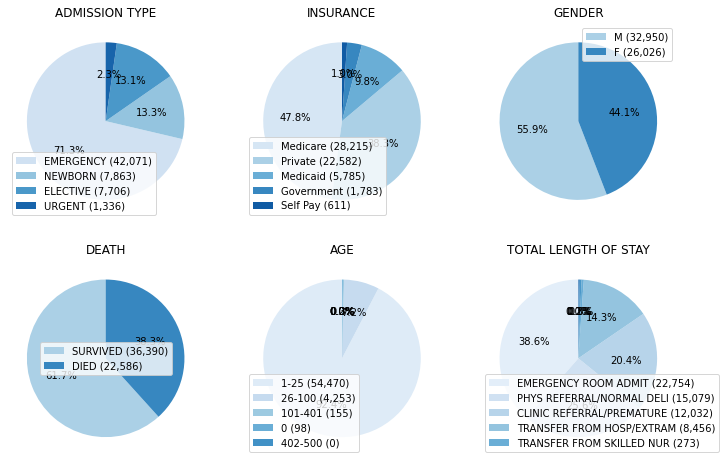

In [11]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' with the required variables
grouped_df = df
# Create a list of variable names
variables = ['ADMISSION_TYPE', 'INSURANCE', 'GENDER', 'EXPIRE_FLAG',  'INTERVAL_group', 'ADMISSION_LOCATION','DISCHARGE_LOCATION','MARITAL_STATUS','LANGUAGE','RELIGION','ETHNICITY','year_age']
title = ['ADMISSION TYPE', 'INSURANCE', 'GENDER', 'DEATH', 'AGE', 'TOTAL LENGTH OF STAY']
# Create a figure with 2 rows and 3 columns to accommodate the 6 pie charts
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Set the background color to white
fig.patch.set_facecolor('white')

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the variables and create a pie chart for each
for i, variable in enumerate(variables):
    # Count the occurrences of each category in the variable
    counts = grouped_df[variable].value_counts()
    
    # Create the pie chart with a different shade of blue for each chart
    colors = sns.color_palette('Blues', len(counts))
    pie = axes[i].pie(counts, labels=None, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[i].set_title(title[i])
    
    # Get the top 5 categories and their counts
    if variable == 'LANGUAGE':
        top_2 = counts.head(2)
        labels = [f'{label} ({count:,})' for label, count in zip(top_2.index, top_2.values)]
        legend_labels = [f'{label} ({count:,})' for label, count in zip(counts.index[:5], counts.values[:5])]
    else:
        top_5 = counts.head(5)
        labels = [f'{label} ({count:,})' for label, count in zip(top_5.index, top_5.values)]
        legend_labels = labels
    
    # Set the labels for the pie chart with better positioning
    axes[i].legend(pie[0], legend_labels, loc='best')
    
# Adjust the spacing between subplots
#plt.title("Visit level variables")
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
df.columns  

Index(['Unnamed: 0', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'GENDER', 'EXPIRE_FLAG', 'DOB', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'LOSRD', 'age', 'year_age', 'ICD9_CODE_procedures',
       'CCS CATEGORY DESCRIPTION_proc', 'CCS CODES_proc',
       'cat_threshold .95 most frequent_proc', 'age_group', 'INTERVAL_group'],
      dtype='object')

In [7]:
df.columns

Index(['Unnamed: 0', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'GENDER', 'EXPIRE_FLAG', 'DOB', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'LOSRD', 'age', 'year_age', 'ICD9_CODE_procedures',
       'CCS CATEGORY DESCRIPTION_proc', 'CCS CODES_proc',
       'cat_threshold .95 most frequent_proc', 'age_group', 'INTERVAL_group'],
      dtype='object')

In [64]:
df.age

0        23714 days, 0:00:00
1        25980 days, 0:00:00
2        27486 days, 0:00:00
3        14250 days, 0:00:00
4        21531 days, 0:00:00
                ...         
58971     7085 days, 0:00:00
58972    30480 days, 0:00:00
58973    15534 days, 0:00:00
58974    22195 days, 0:00:00
58975    23273 days, 0:00:00
Name: age, Length: 58976, dtype: object

In [56]:
def mode(x):
    '''function to obtain the mode'''
    return x.mode()[0]
grouped_df1 = df.groupby('SUBJECT_ID').agg({'age': 'max', 'LOSRD': 'sum','GENDER':mode}).reset_index()


In [98]:
df2 = pd.read_csv('./input_model_pred/ICD9_CODE_procedures_outs_visit_non_filtered.csv')

In [88]:
df2.shape

(50565, 2010)

In [135]:
df2[df2["Age_max"]<0]

,Unnamed: 0,10,11,12,13,14,15,16,17,18,21,22,23,24,28,31,32,33,34,39,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,58,59,60,61,62,63,64,65,66,69,70,71,72,73,74,75,76,77,80,81,82,83,84,91,92,93,94,101,102,106,109,110,113,114,115,118,120,121,122,123,124,125,126,127,128,131,132,139,149,151,152,153,157,159,184,199,202,203,204,205,206,207,211,212,214,215,221,222,229,231,233,234,239,240,242,243,244,245,247,251,252,253,270,280,282,287,290,291,292,293,294,295,296,299,302,303,304,309,310,311,313,315,321,323,324,325,326,329,331,332,339,341,343,344,346,351,353,359,362,370,371,374,379,387,390,391,392,394,395,398,399,400,401,402,403,404,407,409,411,412,415,427,430,433,435,436,437,441,442,443,445,449,458,472,474,479,480,481,485,489,492,500,503,504,524,526,527,529,531,537,539,540,543,544,554,560,562,570,576,580,585,586,598,600,601,602,603,604,605,609,610,611,612,613,620,622,623,625,631,632,633,639,640,642,643,651,652,680,683,684,686,688,689,693,695,697,700,704,708,711,713,714,715,716,721,722,729,734,736,740,741,743,744,750,751,754,758,761,762,763,764,765,771,772,780,781,782,806,811,820,835,843,850,851,852,856,857,859,861,863,864,869,881,883,885,886,887,889,942,944,966,999,1149,1151,1264,1273,1281,1291,1292,1341,1371,1422,1424,1434,1441,1454,1459,1473,1474,1475,1479,1609,1631,1649,1651,1652,1659,1663,1681,1682,1733,1735,1736,1741,1742,1755,1756,1770,1771,1809,1811,1812,1821,1829,1839,1879,2001,2009,2041,2049,2059,2061,2100,2101,2102,2103,2109,2121,2122,2130,2132,2161,2162,2169,2171,2172,2181,2183,2186,2188,2189,2201,2202,2211,2219,2241,2242,2250,2252,2260,2262,2263,2264,2279,2301,2309,2311,2319,2373,2411,2432,2501,2502,2551,2559,2592,2611,2621,2630,2631,2632,2691,2699,2722,2723,2724,2731,2742,2749,2751,2752,2753,2755,2756,2757,2759,2761,2769,2792,2811,2911,2912,2931,2932,2933,2939,2951,2959,3009,3029,3129,3141,3142,3143,3144,3145,3148,3149,3161,3162,3164,3169,3171,3172,3173,3174,3175,3179,3192,3193,3195,3198,3199,3201,3209,3220,3222,3224,3227,3228,3229,3230,3239,3241,3249,3259,3320,3321,3322,3323,3324,3326,3327,3328,3329,3334,3339,3341,3342,3343,3348,3349,3371,3373,3378,3379,3391,3392,3393,3399,3401,3402,3403,3404,3406,3409,3420,3421,3422,3423,3424,3425,3426,3427,3451,3452,3459,3471,3472,3473,3479,3481,3482,3483,3484,3491,3492,3493,3499,3505,3511,3512,3514,3521,3522,3523,3524,3525,3527,3528,3531,3532,3533,3535,3539,3541,3542,3550,3551,3552,3553,3555,3561,3562,3570,3571,3572,3582,3591,3593,3595,3596,3598,3599,3601,3602,3603,3604,3605,3606,3607,3609,3611,3612,3613,3614,3615,3616,3617,3619,3631,3691,3699,3710,3711,3712,3720,3721,3722,3723,3724,3725,3726,3727,3728,3729,3731,3732,3733,3734,3736,3749,3761,3762,3763,3764,3765,3766,3768,3771,3772,3773,3774,3775,3776,3777,3778,3779,3781,3782,3783,3785,3786,3787,3789,3790,3791,3792,3794,3795,3796,3797,3798,3799,3801,3802,3803,3804,3805,3806,3807,3808,3809,3812,3814,3815,3816,3818,3821,3822,3829,3833,3834,3835,3836,3837,3838,3842,3843,3844,3845,3846,3847,3848,3857,3859,3861,3862,3863,3865,3866,3867,3868,3869,3880,3881,3882,3883,3884,3885,3886,3887,3888,3889,3891,3892,3893,3894,3895,3897,3898,3899,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3941,3942,3943,3949,3950,3951,3952,3953,3954,3955,3956,3957,3958,3959,3961,3962,3963,3964,3965,3966,3971,3972,3973,3974,3975,3976,3977,3978,3979,3989,3990,3991,3992,3993,3995,3998,3999,4011,4019,4021,4022,4023,4024,4029,4041,4042,4052,4053,4054,4059,4064,4069,4101,4103,4104,4105,4106,4108,4131,4132,4139,4142,4191,4193,4195,4198,4199,4210,4211,4222,4223,4224,4232,4233,4240,4241,4242,4251,4252,4254,4255,4258,4259,4262,4265,4269,4281,4282,4283,4284,4287,4289,4291,4292,4311,4319,4341,4342,4349,4382,4389,4391,4399,4400,4401,4402,4403,4411,4412,4413,4414,4415,4419,4422,4429,4431,4432,4438,4439,4441,4442,4443,4444,4449,4461,4462,4463,4464,4466,4467,4468,4469,4491,4492,4493,4495,4496,4497,4499,4500,4501,4502,4503,4511,4512,4513,4514,4515,4516,4519,4521,4522,4523,4524,4525,4526,4528,4529,4530,4531,4533,4534,4541,4542,4543,4549,4551,4552,4561,4562,4563,4571,4572,

In [114]:
df["Age_max"] = df["year_age"]

In [99]:
grouped_df1 = df2.groupby('SUBJECT_ID').agg({'Age_max': 'max', 'LOSRD_sum': 'sum','GENDER':mode,'L_1s_last_p1':mode}).reset_index()



In [115]:
df2['GENDER']

0        1.0
1        1.0
2        0.0
3        1.0
4        0.0
        ... 
50560    1.0
50561    1.0
50562    0.0
50563    0.0
50564    0.0
Name: GENDER, Length: 50565, dtype: float64

In [116]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with a column named 'gender' containing 1s and 0s

# Create a dictionary to map the values
gender_map = {1: 'Male', 0: 'Female'}
gender_map2 = {1.0: 'Male', 0.0: 'Female'}

# Use the map function to create a new column 'gender_label'
#df2['GENDER'] = df2['GENDER'].map(gender_map)
grouped_df1['GENDER'] = grouped_df1['GENDER'].map(gender_map2)
df2['GENDER'] = df2['GENDER'].map(gender_map2)

In [117]:
df2['GENDER']

0          Male
1          Male
2        Female
3          Male
4        Female
          ...  
50560      Male
50561      Male
50562    Female
50563    Female
50564    Female
Name: GENDER, Length: 50565, dtype: object

In [161]:
grouped_df1[grouped_df1['GENDER'] == 'Female'] ['Age_max']

Series([], Name: Age_max, dtype: float64)

In [77]:
print(grouped_df1['GENDER'].value_counts())
gender_map = {1.0: 'Male', 0.0: 'Female'}

# Use the map function to create a new column 'gender_label'
grouped_df1['Gender'] = grouped_df1['GENDER'].map(gender_map)
grouped_df1['GENDER'] = np.where(grouped_df1['GENDER'] ==1.0, 'Male', 'Female')

1.0    23405
0.0    17611
Name: GENDER, dtype: int64


In [78]:
grouped_df1[grouped_df1['GENDER'] ==1.0]

,SUBJECT_ID,Age_max,LOSRD_sum,GENDER,L_1s_last_p1,Gender


In [73]:
grouped_df1[grouped_df1['GENDER'] == 'Male']

,SUBJECT_ID,Age_max,LOSRD_sum,GENDER,L_1s_last_p1,Gender


In [122]:
grouped_df1["Age_max"]=[int(i) for i in grouped_df1.Age_max]

In [139]:
df2.iloc[:,-17:]

,9995,9999,SUBJECT_ID,HADM_ID,Age_max,LOSRD_sum,L_1s_last,LOSRD_avg,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,L_1s_last_p1
0,0.0,0.0,2,163353,0.000000,3,0,3,2.0,4.0,4.0,3.0,14.0,6.0,2.0,Male,0.0
1,0.0,0.0,3,145834,76.575342,60,0,10,1.0,2.0,15.0,2.0,3.0,2.0,36.0,Male,0.0
2,0.0,0.0,4,185777,47.876712,21,0,7,1.0,2.0,6.0,3.0,16.0,4.0,36.0,Female,0.0
3,0.0,0.0,5,178980,0.000000,2,0,2,2.0,4.0,4.0,3.0,2.0,6.0,2.0,Male,0.0
4,0.0,0.0,6,107064,65.983562,80,0,16,0.0,4.0,5.0,2.0,14.0,2.0,36.0,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50560,0.0,0.0,99985,176670,53.843836,80,0,16,1.0,2.0,5.0,3.0,10.0,2.0,36.0,Male,0.0
50561,0.0,0.0,99991,151118,47.747945,84,0,12,0.0,4.0,4.0,3.0,14.0,2.0,36.0,Male,0.0
50562,0.0,0.0,99992,197084,65.813699,4,0,2,1.0,1.0,15.0,2.0,3.0,7.0,36.0,Female,0.0
50563,0.0,0.0,99995,137810,88.756164,9,0,3,0.0,4.0,4.0,2.0,14.0,2.0,36.0,Female,0.0


/var/folders/xn/hrsr6_j92psb5bqf9kjzwv8w0000gp/T/ipykernel_52075/291289506.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


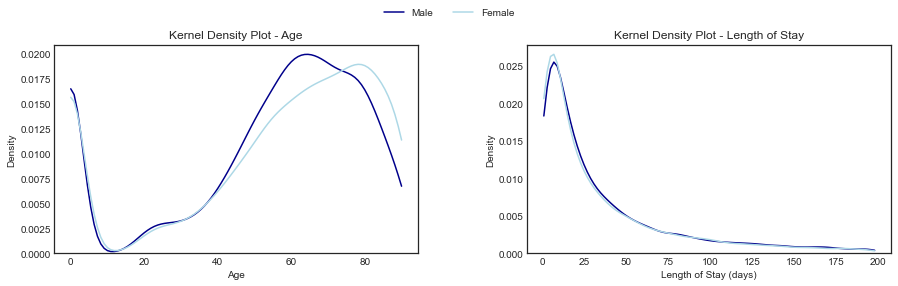

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming 'grouped_df1' is your DataFrame with 'Age_max', 'LOSRD_sum', and 'GENDER' columns

# Set the background style
plt.style.use("seaborn-white")

# Define two shades of blue
dark_blue = "#00008B"   # A dark blue
light_blue = "#ADD8E6"  # A light blue

# Create two figures and axes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Calculate the kernel density estimate for 'Age_max' for each gender
age_max_male = df2[df2['GENDER'] == 'Male']['Age_max']
age_max_female = df2[df2['GENDER'] == 'Female']['Age_max']
kde_age_max_male = gaussian_kde(age_max_male)
kde_age_max_female = gaussian_kde(age_max_female)

# Generate x-values for the kernel density estimate
x_age_max = np.linspace(age_max_male.min(), age_max_male.max(), 100)

# Plot the kernel density estimate for 'Age_max' with the dark blue for male and light blue for female
ax1.plot(x_age_max, kde_age_max_male(x_age_max), color=dark_blue, label='Male')
ax1.plot(x_age_max, kde_age_max_female(x_age_max), color=light_blue, label='Female')

# Set the labels and title for the 'Age_max' plot
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
ax1.set_title('Kernel Density Plot - Age')
ax1.set_ylim(bottom=0)  # Set the y-axis limit to start at zero

# Calculate the kernel density estimate for 'LOSRD_sum' for each gender
aux = df2[df2['LOSRD_sum']<200]
losrd_sum_male = aux[aux['GENDER'] == 'Male'] ['LOSRD_sum']
losrd_sum_female = aux[aux['GENDER'] == 'Female'][ 'LOSRD_sum']
kde_losrd_sum_male = gaussian_kde(losrd_sum_male)
kde_losrd_sum_female = gaussian_kde(losrd_sum_female)

# Generate x-values for the kernel density estimate
x_losrd_sum = np.linspace(losrd_sum_male.min(), losrd_sum_male.max(), 100)

# Plot the kernel density estimate for 'LOSRD_sum' with the dark blue for male and light blue for female
ax2.plot(x_losrd_sum, kde_losrd_sum_male(x_losrd_sum), color=dark_blue, label='Male')
ax2.plot(x_losrd_sum, kde_losrd_sum_female(x_losrd_sum), color=light_blue, label='Female')

# Set the labels and title for the 'LOSRD_sum' plot
ax2.set_xlabel('Length of Stay (days)')
ax2.set_ylabel('Density')
ax2.set_title('Kernel Density Plot - Length of Stay')
ax2.set_ylim(bottom=0)  # Set the y-axis limit to start at zero

# Remove the legends from the individual plots
ax1.legend().remove()
ax2.legend().remove()

# Adjust the layout before adding a common legend
plt.subplots_adjust(wspace=0.3, top=0.85)

# Create a common legend for both plots with corrected labels
fig.legend(labels=['Male', 'Female'], loc='upper center', ncol=2)

# Show the plots
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


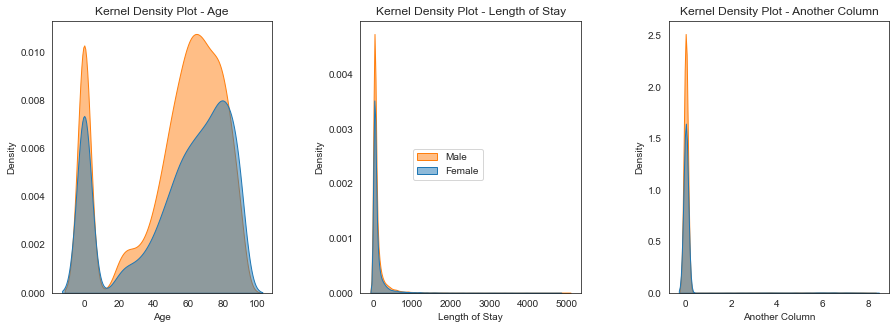

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the 'age' and 'lord' columns

# Set the background color to white
sns.set_style("white")

# Create three subplots in a single figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
sns.kdeplot(data=grouped_df1, x='Age_max', fill=True, hue='GENDER', color='#ADD8E6', alpha=0.5, ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
ax1.set_title('Kernel Density Plot - Age')

# Plot 2
sns.kdeplot(data=grouped_df1, x='LOSRD_sum', fill=True, hue='GENDER', color='#E0FFFF', alpha=0.5, ax=ax2)
ax2.set_xlabel('Length of Stay')
ax2.set_ylabel('Density')
ax2.set_title('Kernel Density Plot - Length of Stay')

# Plot 3
sns.kdeplot(data=grouped_df1, x='L_1s_last_p1', fill=True, hue='GENDER', color='#FFC0CB', alpha=0.5, ax=ax3)
ax3.set_xlabel('Another Column')
ax3.set_ylabel('Density')
ax3.set_title('Kernel Density Plot - Another Column')

# Remove the legends from all plots
ax1.legend().remove()
ax2.legend().remove()
ax3.legend().remove()

# Create a common legend for all plots
legend_labels = ['Male', 'Female']
fig.legend(labels=legend_labels, loc='center')

plt.subplots_adjust(wspace=0.4)

# Show the plots
plt.show()

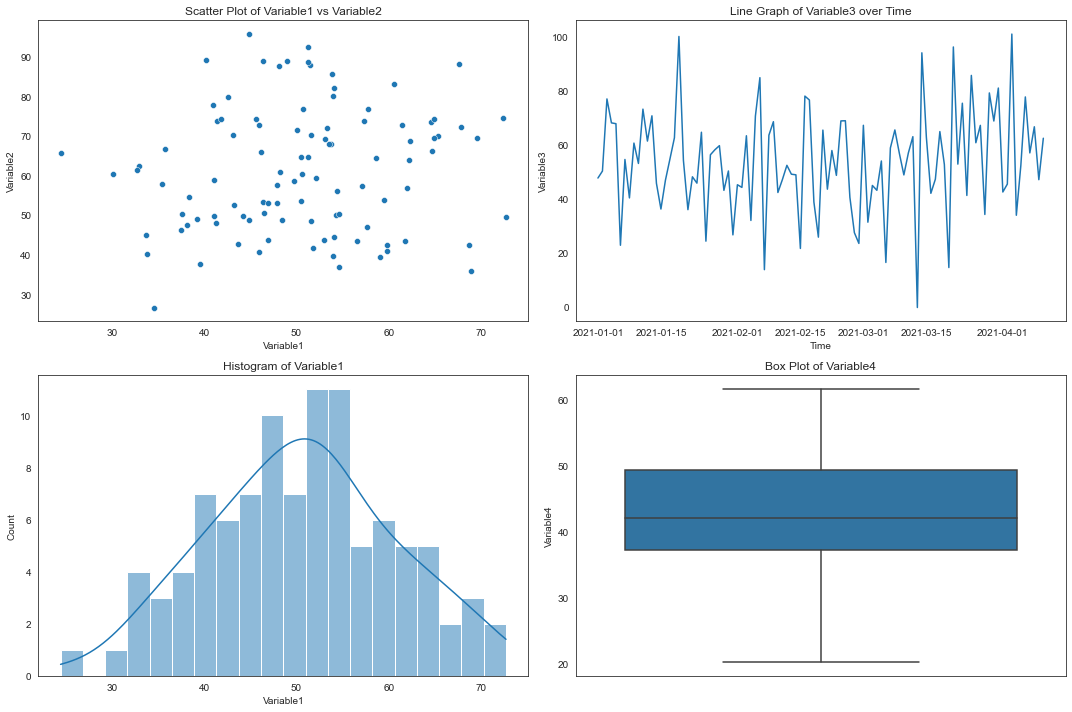

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Generate some sample data
np.random.seed(0)
data = pd.DataFrame({
    'Variable1': np.random.normal(loc=50, scale=10, size=100),
    'Variable2': np.random.normal(loc=60, scale=15, size=100),
    'Variable3': np.random.normal(loc=55, scale=20, size=100),
    'Time': pd.date_range('20210101', periods=100)
})

data['Variable4'] = data['Variable1'] * 0.5 + data['Variable2'] * 0.3 + np.random.normal(loc=0, scale=5, size=100)

# Create a 2x2 grid of plots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Scatter Plot
sns.scatterplot(x='Variable1', y='Variable2', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Scatter Plot of Variable1 vs Variable2')

# Line Graph
sns.lineplot(x='Time', y='Variable3', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Line Graph of Variable3 over Time')

# Histogram
sns.histplot(data['Variable1'], bins=20, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Histogram of Variable1')

# Box Plot
sns.boxplot(y=data['Variable4'], ax=ax[1, 1])
ax[1, 1].set_title('Box Plot of Variable4')

plt.tight_layout()
plt.show()


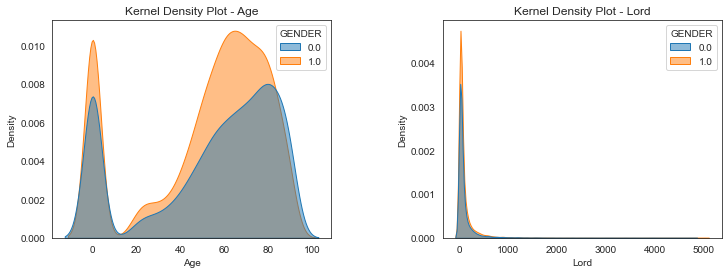

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the 'age' and 'lord' columns

# Set the background color to white
sns.set_style("white")

# Create two figures and axes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the kernel density estimate for 'age' with a green shade
sns.kdeplot(data=grouped_df1, x='Age_max', fill=True, hue='GENDER', color='green', alpha=0.5, ax=ax1)

# Set the labels and title for the 'age' plot
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
ax1.set_title('Kernel Density Plot - Age')

# Plot the kernel density estimate for 'lord' with a green shade
sns.kdeplot(data=grouped_df1, x='LOSRD_sum', fill=True, hue='GENDER', color='green', alpha=0.5, ax=ax2)

# Set the labels and title for the 'lord' plot
ax2.set_xlabel('Lord')
ax2.set_ylabel('Density')
ax2.set_title('Kernel Density Plot - Lord')

# Change the majority of 'GENDER' labels to 'Male' (1.0) and the minority to 'Female' (0.0)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plots
plt.show()

# Preds

In [1]:
%load_ext autoreload
%autoreload 2
from function_pred import *
days = '30'
ejemplo_dir = './input_model_pred/'
archivo_input_label = 'data_preprocess_non_filtered.csv'


path = "./input_model_pred/" +"images"
days_list = ["90"]
ficheros = read_director(ejemplo_dir)
len(ficheros)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


['.DS_Store', 'cat_threshold .88 most frequent_outs_visit_non_filtered.csv', 'cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv', 'cat_threshold .999 most frequent_outs_visit_non_filtered.csv', 'cat_threshold .98 most frequent_outs_visit_non_filtered.csv', 'sin_codigo_non_filtered.csv', 'CCS CODES_proc_outs_visit_non_filtered.csv', 'ICD9_CODE_procedures_outs_visit_non_filtered.csv']


7

In [17]:
for i in ficheros:
    print(i)
    
ficheros = [i for i in ficheros if i != 'sin_codigo_non_filtered.csv']
ficheros

cat_threshold .88 most frequent_outs_visit_non_filtered.csv
cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv
cat_threshold .999 most frequent_outs_visit_non_filtered.csv
cat_threshold .98 most frequent_outs_visit_non_filtered.csv
CCS CODES_proc_outs_visit_non_filtered.csv
ICD9_CODE_procedures_outs_visit_non_filtered.csv


['cat_threshold .88 most frequent_outs_visit_non_filtered.csv',
 'cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv',
 'cat_threshold .999 most frequent_outs_visit_non_filtered.csv',
 'cat_threshold .98 most frequent_outs_visit_non_filtered.csv',
 'CCS CODES_proc_outs_visit_non_filtered.csv',
 'ICD9_CODE_procedures_outs_visit_non_filtered.csv']

In [34]:
 X_aux = pd.read_csv(ejemplo_dir+'cat_threshold .88 most frequent_outs_visit_non_filtered.csv')
 X_aux.columns[-17:]

Index(['9971', '9983', 'SUBJECT_ID', 'HADM_ID', 'Age_max', 'LOSRD_sum',
       'L_1s_last', 'LOSRD_avg', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'RELIGION', 'MARITAL_STATUS',
       'ETHNICITY', 'GENDER', 'L_1s_last_p1'],
      dtype='object')

In [35]:
dataframes = []
for i in ficheros:
        
    if i in ['ICD9_CODE_procedures.csv', 'CCS CODES_proc.csv', 'cat_threshold .999 most frequent']:
        prepo = "max"
    elif i in ['cat_threshold .95 most frequent_proc','cat_threshold .88 most frequent']:
        prepo = "power"
    else:
        prepo = "std"
    print(prepo)
    
    # se obtiene la matriz de features y la variable response
    X_aux = pd.read_csv(ejemplo_dir+i)
    
    # if it's not BERT embedding, we do the preprocessing
    X_aux = X_aux.drop(["HADM_ID","SUBJECT_ID",'Unnamed: 0','L_1s_last','HADM_ID', 'Age_max', 'LOSRD_sum',
       'L_1s_last', 'LOSRD_avg', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'RELIGION', 'MARITAL_STATUS',
       'ETHNICITY', 'GENDER', 'L_1s_last_p1'], axis=1)

    try:
        X = X_aux.values
        dataframes.append(pd.DataFrame(X))
    except:
        pass


std
std
std
std
std
std


In [25]:
dataframes[0]

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,4.0,4.0,3.0,14.0,6.0,2.0,1.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,1.0,2.0,15.0,2.0,3.0,2.0,36.0,1.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,1.0,2.0,6.0,3.0,16.0,4.0,36.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,4.0,4.0,3.0,2.0,6.0,2.0,1.0,0.0
4,0.000014,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,0.0,4.0,5.0,2.0,14.0,2.0,36.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50560,0.000000,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,1.0,2.0,5.0,3.0,10.0,2.0,36.0,1.0,0.0
50561,0.000009,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,4.0,4.0,3.0,14.0,2.0,36.0,1.0,0.0
50562,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,15.0,2.0,3.0,7.0,36.0,0.0,0.0
50563,0.000009,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,4.0,4.0,2.0,14.0,2.0,36.0,0.0,0.0


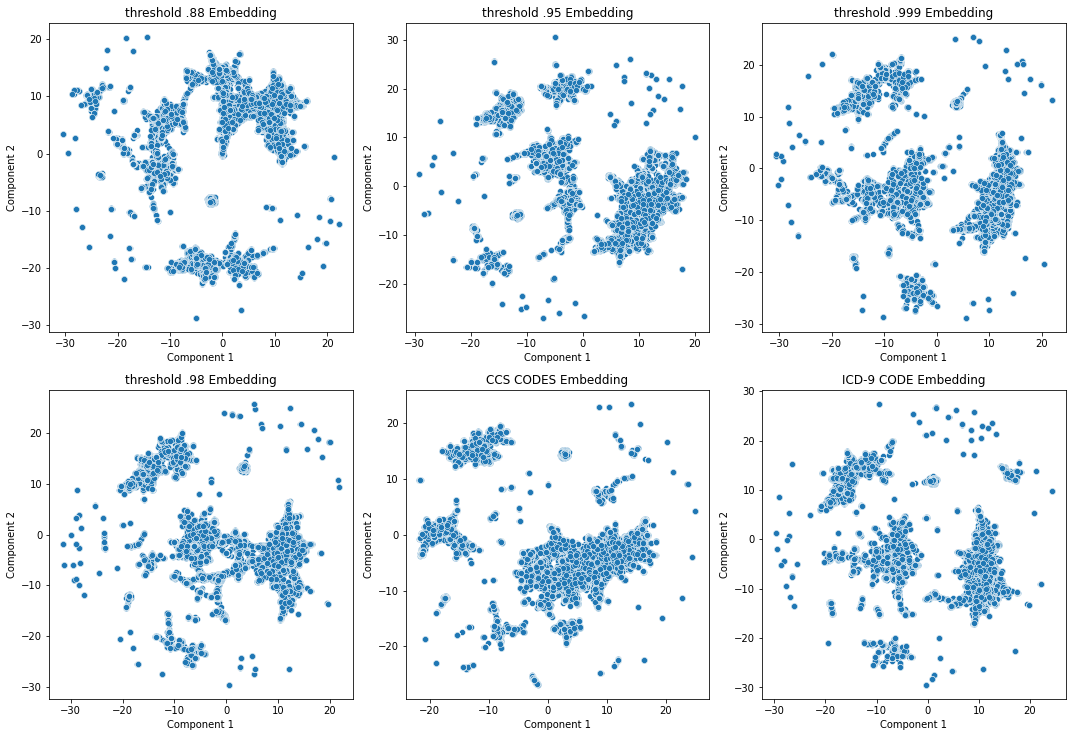

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pacmap

# Assuming you have a list of 7 DataFrames
#dataframes = [df1, df2, df3, df4, df5, df6, df7]
title = ['threshold .88',
 'threshold .95',
 'threshold .999',
 'threshold .98',
 'CCS CODES',
 'ICD-9 CODE']
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easy looping

# Loop through each DataFrame, perform PaCMAP embedding, and create a subplot
for i, df in enumerate(dataframes):
    # Perform PaCMAP embedding for each DataFrame
    embedding = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 
    X_transformed = embedding.fit_transform(df, init="pca")

    # Plotting the transformed data
    sns.scatterplot(
        x=X_transformed[:, 0],
        y=X_transformed[:, 1],
        ax=axes[i]
    )
    axes[i].set_title(title[i]+' Embedding')
    axes[i].set_xlabel('Component 1')
    axes[i].set_ylabel('Component 2')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


## preds results

In [43]:
res = pd.read_csv('./results_pred/results_prediction_30+_realv3.csv')


In [42]:
res.shape

(56, 18)

In [43]:
res.drop_duplicates()

(56, 18)

In [46]:
res.columns

Index(['Unnamed: 0', 'f1_test', 'f1_train', 'sensitivity_test',
       'specificity_test', 'precision_test', 'accuracy_test',
       'sensitivity_train', 'specificity_train', 'precision_train',
       'accuracy_train', 'confusion matrix', 'Sampling', 'Feature selection',
       'Classifiers', 'Mapping', 'var_change', 'var_ini'],
      dtype='object')

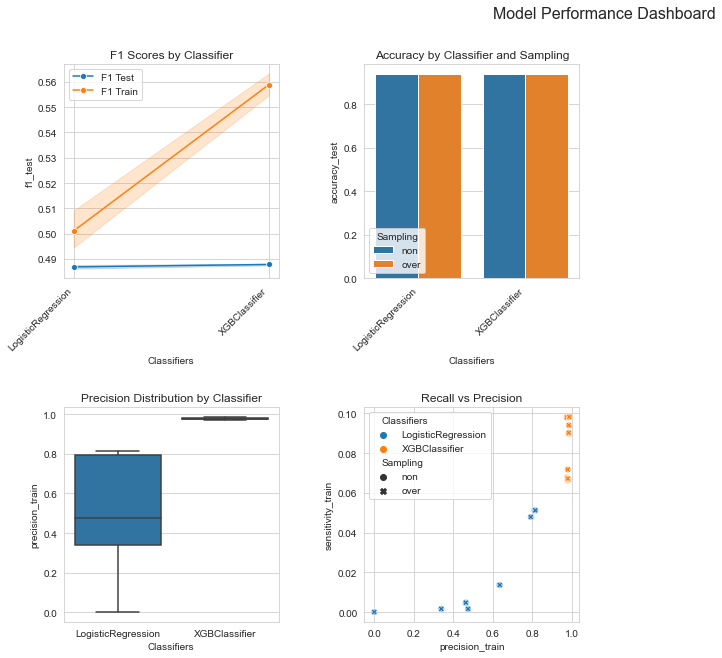

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe with the data
# df = pd.read_csv('your_data.csv')  # If your data is in a CSV file

# Set the style
sns.set_style("whitegrid")

# Create a figure for the combined dashboard
fig = plt.figure(figsize=(20, 10))

# Create a grid for the subplots
grid = plt.GridSpec(2, 4, hspace=0.6, wspace=0.4)

# Add a line chart for F1 scores on the top left of the grid
ax1 = fig.add_subplot(grid[0, 0])
sns.lineplot(data=res, x='Classifiers', y='f1_test', marker='o', label='F1 Test', ax=ax1)
sns.lineplot(data=res, x='Classifiers', y='f1_train', marker='o', label='F1 Train', ax=ax1)
ax1.set_title('F1 Scores by Classifier')
ax1.set_xticklabels(res['Classifiers'].unique(), rotation=45, ha='right')

# Add a bar chart for accuracy on the top right of the grid
ax2 = fig.add_subplot(grid[0, 1])
sns.barplot(data=res, x='Classifiers', y='accuracy_test', hue='Sampling', ax=ax2)
ax2.set_title('Accuracy by Classifier and Sampling')
ax2.set_xticklabels(res['Classifiers'].unique(), rotation=45, ha='right')

# Add a box plot for precision on the bottom left of the grid
ax3 = fig.add_subplot(grid[1, 0])
sns.boxplot(data=res, x='Classifiers', y='precision_train', ax=ax3)
ax3.set_title('Precision Distribution by Classifier')
#ax3.set_xticklabels(df['Classifiers'].unique(), rotation=45, ha='right')

# Add a scatter plot for recall vs. precision on the bottom right of the grid
ax4 = fig.add_subplot(grid[1, 1])
sns.scatterplot(data=res, x='precision_train', y='sensitivity_train', hue='Classifiers', style='Sampling', ax=ax4)
ax4.set_title('Recall vs Precision')

# Adjust subplots
plt.subplots_adjust(top=0.9)

# Add an overall title
plt.suptitle('Model Performance Dashboard', fontsize=16)

# Show the plot
plt.show()


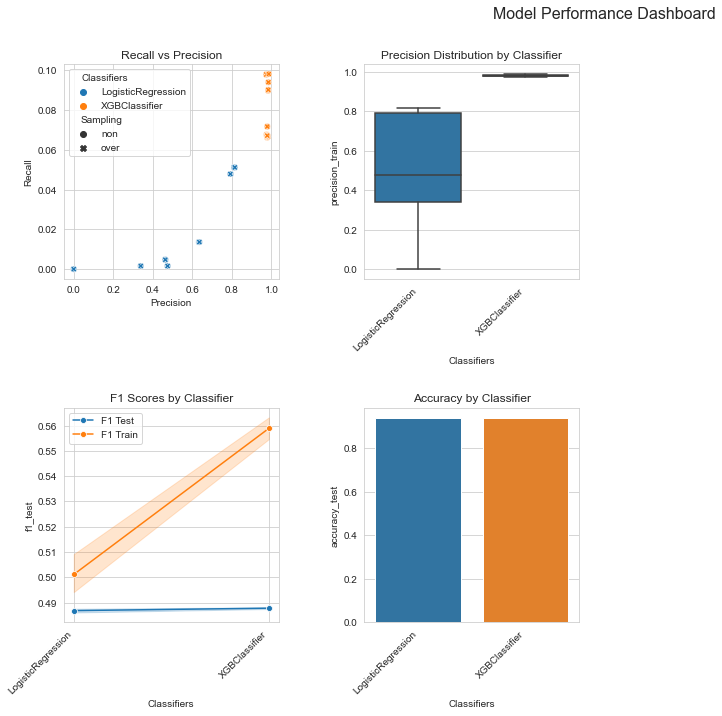

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe with the data
# df = pd.read_csv('your_data.csv')  # If your data is in a CSV file

# Set the style
sns.set_style("whitegrid")

# Create a figure for the combined dashboard
fig = plt.figure(figsize=(20, 10))

# Create a grid for the subplots
grid = plt.GridSpec(2, 4, hspace=0.6, wspace=0.4)

# Add a scatter plot for recall vs. precision on the top left of the grid
ax1 = fig.add_subplot(grid[0, 0])
sns.scatterplot(data=res, x='precision_train', y='sensitivity_train', hue='Classifiers', style='Sampling', ax=ax1)
ax1.set_title('Recall vs Precision')
ax1.set_xlabel('Precision')
ax1.set_ylabel('Recall')

# Add a box plot for precision on the top right of the grid
ax2 = fig.add_subplot(grid[0, 1])
sns.boxplot(data=res, x='Classifiers', y='precision_train', ax=ax2)
ax2.set_title('Precision Distribution by Classifier')
ax2.set_xticklabels(res['Classifiers'].unique(), rotation=45, ha='right')

# Add a line chart for F1 scores on the bottom left of the grid
ax3 = fig.add_subplot(grid[1, 0])
sns.lineplot(data=res, x='Classifiers', y='f1_test', marker='o', label='F1 Test', ax=ax3)
sns.lineplot(data=res, x='Classifiers', y='f1_train', marker='o', label='F1 Train', ax=ax3)
ax3.set_title('F1 Scores by Classifier')
ax3.set_xticklabels(res['Classifiers'].unique(), rotation=45, ha='right')

# Add a bar chart for accuracy on the bottom right of the grid
ax4 = fig.add_subplot(grid[1, 1])
sns.barplot(data=res, x='Classifiers', y='accuracy_test', ax=ax4)
ax4.set_title('Accuracy by Classifier')
ax4.set_xticklabels(res['Classifiers'].unique(), rotation=45, ha='right')

# Adjust subplots
plt.subplots_adjust(top=0.9)

# Add an overall title
plt.suptitle('Model Performance Dashboard', fontsize=16)

# Show the plot
plt.show()

In [62]:
res["Classifiers"].unique()

array(['LogisticRegression', 'XGBClassifier'], dtype=object)

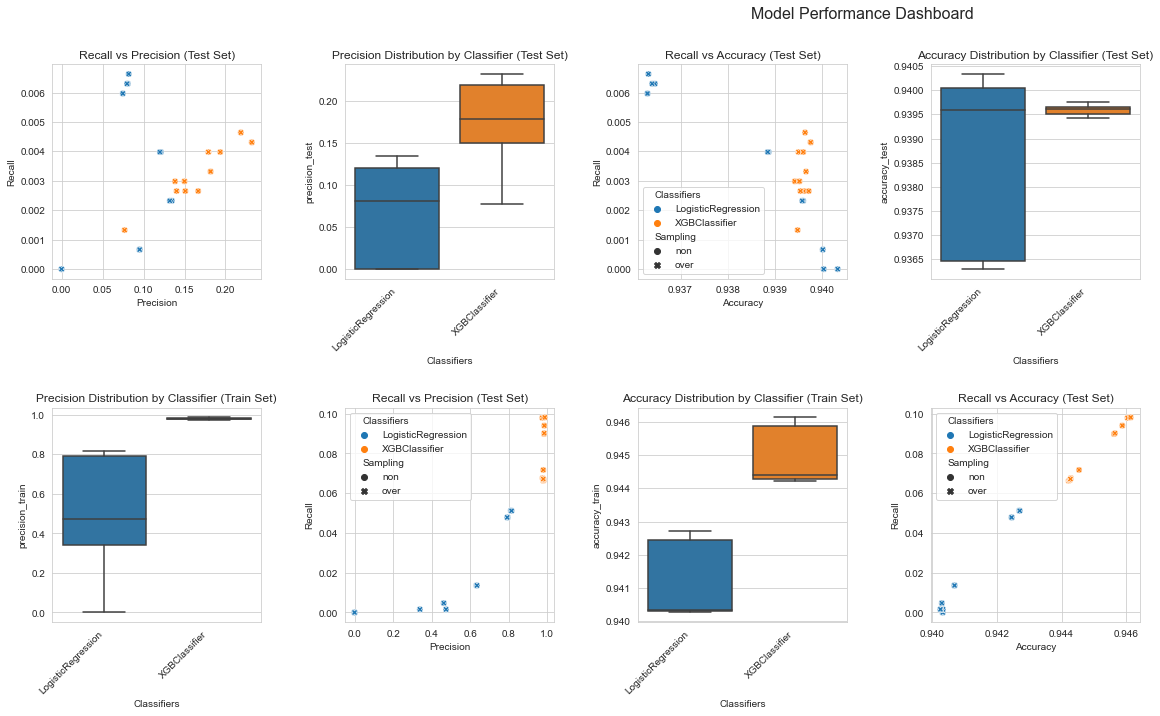

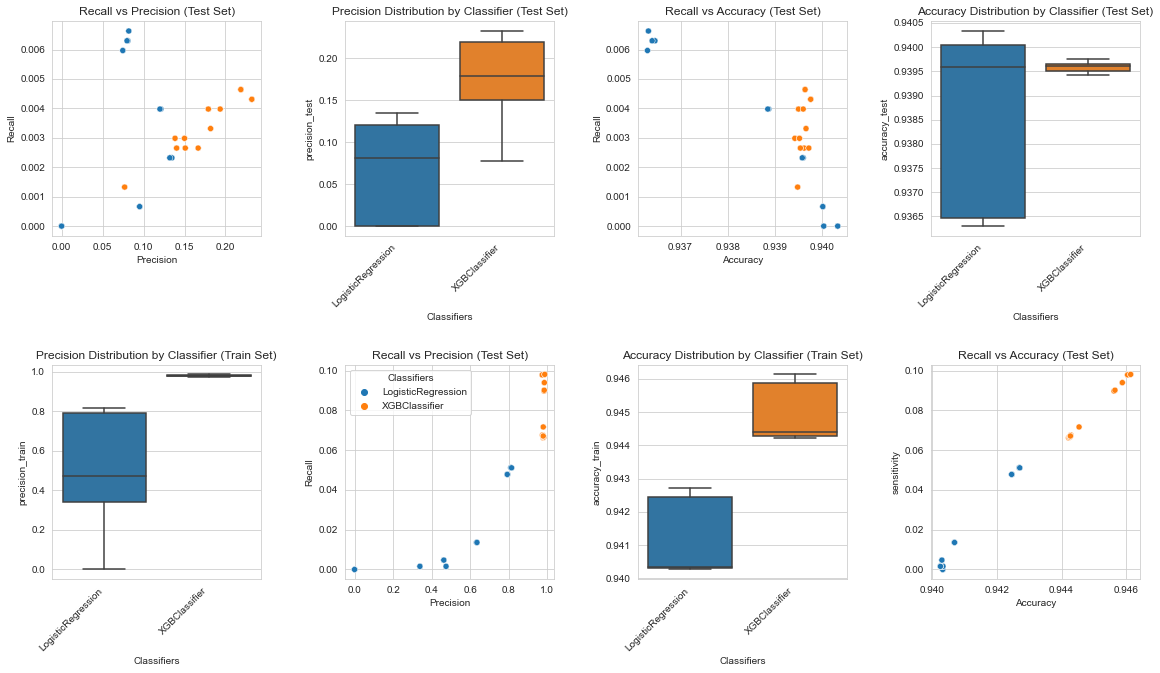

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe with the data
# df = pd.read_csv('your_data.csv')  # If your data is in a CSV file

# Set the style
sns.set_style("whitegrid")

# Create a figure for the combined dashboard
fig = plt.figure(figsize=(30, 10))

# Create a grid for the subplots
grid = plt.GridSpec(2, 6, hspace=0.6, wspace=0.4)

# Add a scatter plot for recall vs. precision on the top left of the grid (using test set data)
ax1 = fig.add_subplot(grid[0, 0])
scatterplot = sns.scatterplot(data=res, x='precision_test', y='sensitivity_test', hue='Classifiers',  ax=ax1)
ax1.set_title('Recall vs Precision (Test Set)')
ax1.set_xlabel('Precision')
ax1.set_ylabel('Recall')

# Add a box plot for precision on the top right of the grid (using test set data)
ax2 = fig.add_subplot(grid[0, 1])
sns.boxplot(data=res, x='Classifiers', y='precision_test', ax=ax2)
ax2.set_title('Precision Distribution by Classifier (Test Set)')
ax2.set_xticklabels(res['Classifiers'].unique(), rotation=45, ha='right')

# Add a line chart for F1 scores on the bottom left of the grid
ax3 = fig.add_subplot(grid[1, 0])
sns.boxplot(data=res, x='Classifiers', y='precision_train', ax=ax3)
ax3.set_title('Precision Distribution by Classifier (Train Set)')
ax3.set_xticklabels(res['Classifiers'].unique(), rotation=45, ha='right')

# Add a bar chart for accuracy on the bottom right of the grid
ax4 = fig.add_subplot(grid[1, 1])
sns.scatterplot(data=res, x='precision_train', y='sensitivity_train', hue='Classifiers', ax=ax4)
ax4.set_title('Recall vs Precision (Test Set)')
ax4.set_xlabel('Precision')
ax4.set_ylabel('Recall')

# Add a scatter plot for recall vs. accuracy on the top middle of the grid (using test set data)
ax5 = fig.add_subplot(grid[0, 2])
sns.scatterplot(data=res, x='accuracy_test', y='sensitivity_test', hue='Classifiers', ax=ax5)
ax5.set_title('Recall vs Accuracy (Test Set)')
ax5.set_xlabel('Accuracy')
ax5.set_ylabel('Recall')

# Add a box plot for accuracy on the top right of the grid (using test set data)
ax6 = fig.add_subplot(grid[0, 3])
sns.boxplot(data=res, x='Classifiers', y='accuracy_test', ax=ax6)
ax6.set_title('Accuracy Distribution by Classifier (Test Set)')
ax6.set_xticklabels(res['Classifiers'].unique(), rotation=45, ha='right')

# Add a line chart for F1 scores on the bottom middle of the grid
ax7 = fig.add_subplot(grid[1, 2])
sns.boxplot(data=res, x='Classifiers', y='accuracy_train', ax=ax7)
ax7.set_title('Accuracy Distribution by Classifier (Train Set)')
ax7.set_xticklabels(res['Classifiers'].unique(), rotation=45, ha='right')

# Add a bar chart for accuracy on the bottom right of the grid
ax8 = fig.add_subplot(grid[1, 3])
sns.scatterplot(data=res, x='accuracy_train', y='sensitivity_train', hue='Classifiers', ax=ax8)
ax8.set_title('Recall vs Accuracy (Test Set)')
ax8.set_xlabel('Accuracy')
ax8.set_ylabel('sensitivity')

# Remove the legend from all scatter plots except the first one
for ax in [ax1, ax5, ax8]:
    try:
       ax.get_legend().remove()
    except:
        pass   

# Adjust subplots
plt.subplots_adjust(top=0.9)

# Add an overall title
plt.suptitle('', fontsize=16)

# Show the plot
plt.show()

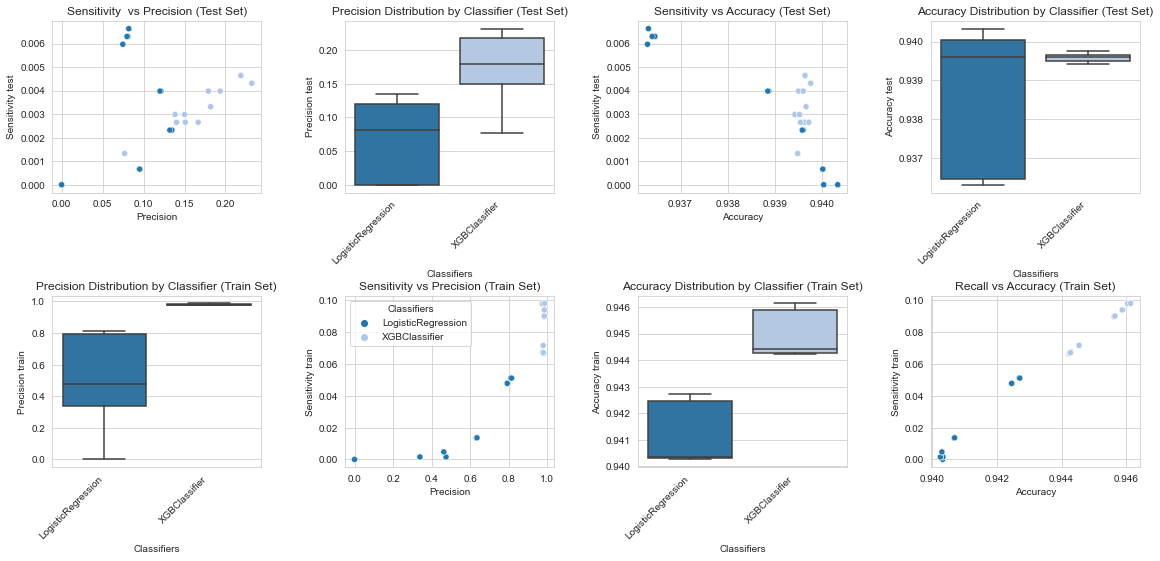

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe with the data
# df = pd.read_csv('your_data.csv')  # If your data is in a CSV file

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette(["#1f77b4", "#aec7e8"])

# Create a figure for the combined dashboard
fig = plt.figure(figsize=(30, 8))

# Create a grid for the subplots
grid = plt.GridSpec(2, 6, hspace=0.6, wspace=0.4)

# Add a scatter plot for recall vs. precision on the top left of the grid (using test set data)
ax1 = fig.add_subplot(grid[0, 0])
scatterplot = sns.scatterplot(data=res, x='precision_test', y='sensitivity_test', hue='Classifiers',  ax=ax1)
ax1.set_title('Sensitivity  vs Precision (Test Set)')
ax1.set_xlabel('Precision')
ax1.set_ylabel('Sensitivity test')  # Change the y-axis label here

# Add a box plot for precision on the top right of the grid (using test set data)
ax2 = fig.add_subplot(grid[0, 1])
sns.boxplot(data=res, x='Classifiers', y='precision_test', ax=ax2)
ax2.set_title('Precision Distribution by Classifier (Test Set)')
ax2.set_xticklabels(res['Classifiers'].unique(), rotation=45, ha='right')
ax2.set_ylabel('Precision test')
# Add a line chart for F1 scores on the bottom left of the grid
ax3 = fig.add_subplot(grid[1, 0])
sns.boxplot(data=res, x='Classifiers', y='precision_train', ax=ax3)
ax3.set_title('Precision Distribution by Classifier (Train Set)')
ax3.set_xticklabels(res['Classifiers'].unique(), rotation=45, ha='right')
ax3.set_ylabel('Precision train')

# Add a bar chart for accuracy on the bottom right of the grid
ax4 = fig.add_subplot(grid[1, 1])
sns.scatterplot(data=res, x='precision_train', y='sensitivity_train', hue='Classifiers', ax=ax4)
ax4.set_title('Sensitivity vs Precision (Train Set)')
ax4.set_xlabel('Precision')
ax4.set_ylabel('Sensitivity train')  # Change the y-axis label here

# Add a scatter plot for recall vs. accuracy on the top middle of the grid (using test set data)
ax5 = fig.add_subplot(grid[0, 2])
sns.scatterplot(data=res, x='accuracy_test', y='sensitivity_test', hue='Classifiers', ax=ax5)
ax5.set_title('Sensitivity vs Accuracy (Test Set)')
ax5.set_xlabel('Accuracy')
ax5.set_ylabel('Sensitivity test')  # Change the y-axis label here

# Add a box plot for accuracy on the top right of the grid (using test set data)
ax6 = fig.add_subplot(grid[0, 3])
sns.boxplot(data=res, x='Classifiers', y='accuracy_test', ax=ax6)
ax6.set_title('Accuracy Distribution by Classifier (Test Set)')
ax6.set_xticklabels(res['Classifiers'].unique(), rotation=45, ha='right')
ax6.set_ylabel('Accuracy test')
# Add a line chart for F1 scores on the bottom middle of the grid
ax7 = fig.add_subplot(grid[1, 2])
sns.boxplot(data=res, x='Classifiers', y='accuracy_train', ax=ax7)
ax7.set_title('Accuracy Distribution by Classifier (Train Set)')
ax7.set_xticklabels(res['Classifiers'].unique(), rotation=45, ha='right')
ax7.set_ylabel('Accuracy train')

# Add a bar chart for accuracy on the bottom right of the grid
ax8 = fig.add_subplot(grid[1, 3])
sns.scatterplot(data=res, x='accuracy_train', y='sensitivity_train', hue='Classifiers', ax=ax8)
ax8.set_title('Recall vs Accuracy (Train Set)')
ax8.set_xlabel('Accuracy')
ax8.set_ylabel('Sensitivity train')  # Change the y-axis label here

# Remove the legend from all scatter plots except the first one
for ax in [ax1, ax5, ax8]:
    try:
       ax.get_legend().remove()
    except:
        pass   

# Adjust subplots
plt.subplots_adjust(top=0.9)

# Add an overall title
plt.suptitle('', fontsize=16)

# Show the plot
plt.show()

In [105]:
res.head()

,Unnamed: 0,f1_test,f1_train,sensitivity_test,specificity_test,precision_test,accuracy_test,sensitivity_train,specificity_train,precision_train,accuracy_train,confusion matrix,Sampling,Feature selection,Classifiers,Mapping,var_change,var_ini
0,0,0.489431,0.533389,0.006300,0.995457,0.080851,0.936458,0.051227,0.999243,0.811024,0.942698,[[47333 216]\n [ 2997 19]],non,True,LogisticRegression,ICD9_CODE_procedures_outs_visit_non_filtered.csv,182,2005
1,1,0.489410,0.533333,0.006300,0.995394,0.079832,0.936399,0.051144,0.999264,0.815059,0.942712,[[47330 219]\n [ 2997 19]],non,False,LogisticRegression,ICD9_CODE_procedures_outs_visit_non_filtered.csv,0,2005
2,2,0.489431,0.533389,0.006300,0.995457,0.080851,0.936458,0.051227,0.999243,0.811024,0.942698,[[47333 216]\n [ 2997 19]],over,True,LogisticRegression,ICD9_CODE_procedures_outs_visit_non_filtered.csv,182,2005
3,3,0.489410,0.533333,0.006300,0.995394,0.079832,0.936399,0.051144,0.999264,0.815059,0.942712,[[47330 219]\n [ 2997 19]],over,False,LogisticRegression,ICD9_CODE_procedures_outs_visit_non_filtered.csv,0,2005
4,4,0.485701,0.548869,0.001326,0.998991,0.076923,0.939484,0.067639,0.999895,0.976077,0.944290,[[47501 48]\n [ 3012 4]],non,True,XGBClassifier,ICD9_CODE_procedures_outs_visit_non_filtered.csv,182,2005


In [104]:
res.columns

Index(['Unnamed: 0', 'f1_test', 'f1_train', 'sensitivity_test',
       'specificity_test', 'precision_test', 'accuracy_test',
       'sensitivity_train', 'specificity_train', 'precision_train',
       'accuracy_train', 'confusion matrix', 'Sampling', 'Feature selection',
       'Classifiers', 'Mapping', 'var_change', 'var_ini'],
      dtype='object')

In [106]:
res["Mapping"] = res["Mapping"].replace('CCS CODES_proc_outs_visit_non_filtered.csv', 'CCS CODES')
res["Mapping"] = res["Mapping"].replace('ICD9_CODE_procedures_outs_visit_non_filtered.csv', 'ICD-9 CODES')
res["Mapping"] = res["Mapping"].replace('cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv', 'threshold .95')
res["Mapping"] = res["Mapping"].replace('cat_threshold .88 most frequent_outs_visit_non_filtered.csv', 'threshold .88')
res["Mapping"] = res["Mapping"].replace('cat_threshold .999 most frequent_outs_visit_non_filtered.csv', 'threshold .999')
res["Mapping"] = res["Mapping"].replace('cat_threshold .98 most frequent_outs_visit_non_filtered.csv', 'threshold .98')
res["Mapping"] = res["Mapping"].replace('sin_codigo_non_filtered.csv', 'No ICD9-Codes')


In [113]:
pivot_df

,var_change,var_ini
Mapping,,
CCS CODES,5,232
ICD-9 CODES,182,2005
No ICD9-Codes,0,11
threshold .88,1,227
threshold .95,6,455
threshold .98,16,763
threshold .999,92,1776


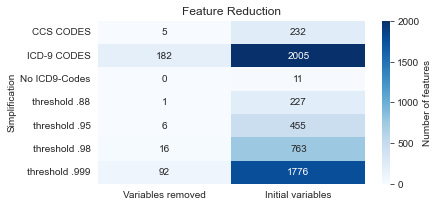

In [125]:
df = res[res["Feature selection"]==True]

# Pivot the DataFrame for the heatmap
pivot_df = df.pivot_table(index=['Mapping', ], values=[ 'var_change','var_ini'])
pivot_df = pivot_df.rename(columns={'var_change': 'Variables removed', 'var_ini': 'Initial variables'})
plt.figure(figsize=(6, 3))
heatmap = sns.heatmap(pivot_df, cmap='Blues', annot=True, fmt=".0f")  # Change the cmap to 'Blues' for different shades of blue
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0)  # Change the x-axis labels rotation if needed
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)  # Change the y-axis labels rotation if needed
plt.xlabel('')  # Change the x-axis label here
plt.ylabel('Simplification')  # Change the y-axis label here

# Change the 'var_change' and 'var_ini' labels in the colorbar
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Number of features')

plt.title('Feature Reduction')
plt.show()

# demografics

In [2]:
df = pd.read_csv("./data/data_preprocess_non_filtered.csv")
pd.set_option('display.max_columns', None)




In [4]:
df.columns

Index(['Unnamed: 0', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'GENDER', 'EXPIRE_FLAG', 'DOB', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'LOSRD', 'age', 'year_age', 'ICD9_CODE_procedures',
       'CCS CATEGORY DESCRIPTION_proc', 'CCS CODES_proc',
       'cat_threshold .95 most frequent_proc'],
      dtype='object')

In [17]:
print(df.GENDER.value_counts())
uq = df.GENDER.unique()
[print(i .replace("'", "")) for i in uq]

M    32950
F    26026
Name: GENDER, dtype: int64
F
M


[None, None]

In [ ]:
print(df.ETHNICITY.value_counts())
uq = df.ETHNICITY.unique()
[print(i .replace("'", "")) for i in uq]

WHITE                                                       40996
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85
WHITE - OT

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
print(df.ETHNICITY.value_counts())
uq = df.ETHNICITY.unique()
[print(i .replace("'", "")) for i in uq]

WHITE                                                       40996
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85
WHITE - OT

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [28]:
%load_ext autoreload
%autoreload 2
from function_mapping import *

df = pd.read_csv("./data/data_preprocess_non_filtered.csv")
pd.set_option('display.max_columns', None)

#Lectures of dataframe that have the procedures icd-9 codes with different threshold
proc = pd.read_csv("./data/procedures_preprocess_threshold_nonfiltered.csv")
grouped = proc.groupby(['SUBJECT_ID', 'HADM_ID']).agg(lambda x: x.tolist())

# Reset
# the index to make 'SUBJECT_ID' and 'HADM_ID' regular columns
grouped_proc = grouped.reset_index()
df1=grouped_proc.copy()

list_cat = ['CCS CODES_proc', 'cat_threshold .95 most frequent_proc','cat_threshold .88 most frequent', 'cat_threshold .98 most frequent',
              'cat_threshold .999 most frequent']

categorical_cols = ['ADMISSION_TYPE', 'ADMISSION_LOCATION',
              'DISCHARGE_LOCATION', 'INSURANCE',  'RELIGION',
              'MARITAL_STATUS', 'ETHNICITY','GENDER']


nam_p_list = ['CCS CODES_proc', 'cat_threshold .95 most frequent_proc','Threshold', 'Threshold',
       'Threshold']

filtered = True
v = "j" 


result_stat  = {'Name' : [],
       'count': [],
'mean': [],
'std': [],
'min': [],
'25%': [],
'50%': [],
'75%': [],
'max': [] ,
"Min >":[],
"Unique_codes":[],
"Unique_codes_icd9":[]}
list_dataframes = []
for i in range(len(list_cat)):
       nam_p = nam_p_list[i]
       real = list_cat[i]
       df_descon = obtener_ghist(i,df,df1,nam_p,v,real,filtered)
       list_dataframes.append(df_descon) 
       

#df_res = pd.DataFrame(result_stat)
#df_res.to_csv("./results_changes/"+v+"_nonfiltered.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
        SUBJECT_ID  HADM_ID  ICD9_CODE_procedures
0               22   165315                  9671
1               22   165315                  9604
2               22   165315                  9634
3               23   152223                  3613
4               23   152223                  3615
...            ...      ...                   ...
240090       98805   122631                  1742
240091       98813   170407                  9671
240092       98813   170407                  3893
240093       98813   170407                  9604
240094       98813   170407                   966

[240095 rows x 3 columns]
        SUBJECT_ID  HADM_ID CCS CODES_proc_preprocess
0               22   165315                       216
1               22   165315                       216
2               22   165315                       93'
3               23   152223                        44
4              

In [39]:
list_dataframes[1].iloc[:,:4]

,index,SUBJECT_ID,HADM_ID,cat_threshold .95 most frequent_proc_preprocess
0,834,2,163353,9955
1,835,3,145834,3893
2,836,3,145834,9672
3,837,3,145834,9604
4,838,3,145834,966
...,...,...,...,...
240090,230744,99999,113369,8108
240091,230745,99999,113369,8051
240092,230746,99999,113369,8451
240093,230747,99999,113369,8162


In [40]:
new_l = [i.iloc[:,:4] for i in list_dataframes]

In [46]:
df = list_dataframes[1]
df.head()

,index,SUBJECT_ID,HADM_ID,cat_threshold .95 most frequent_proc_preprocess,ICD9_CODE_procedures
0,834,2,163353,9955,9671
1,835,3,145834,3893,9604
2,836,3,145834,9672,9634
3,837,3,145834,9604,3613
4,838,3,145834,966,3615


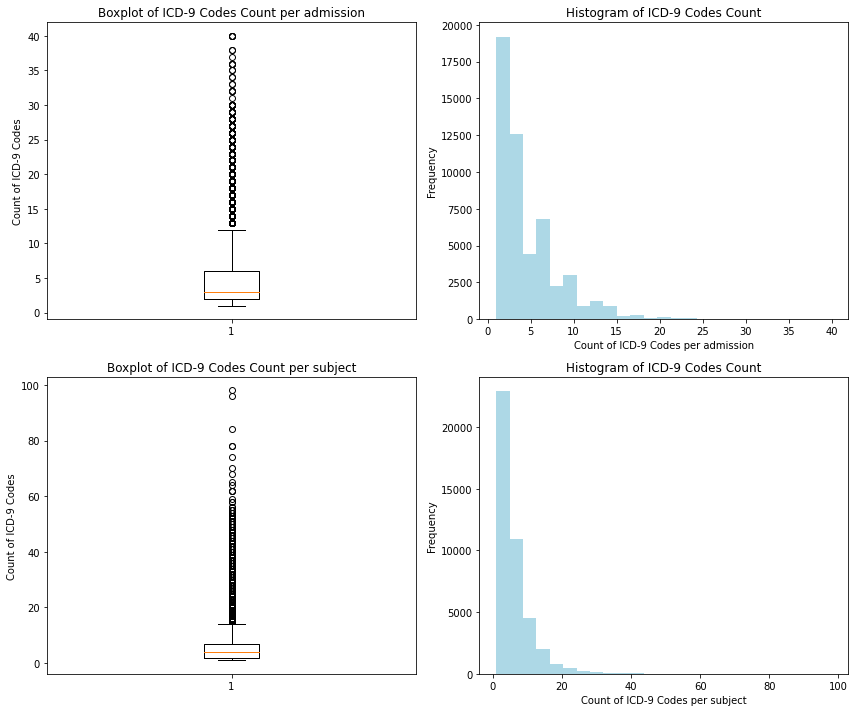

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame


# Count the number of ICD-9 codes per admission
icd9_counts_a = df.groupby('HADM_ID')['ICD9_CODE_procedures'].count().reset_index(name='count_icd9_codes')

# If you have specific admission IDs you want to plot, filter them here
# For example, if you want to plot for admission IDs 'A1', 'A2', 'A3', 'A4', 'A5'
selected_admissions_a = icd9_counts_a

icd9_counts = df.groupby('SUBJECT_ID')['ICD9_CODE_procedures'].count().reset_index(name='count_icd9_codes')

# If you have specific admission IDs you want to plot, filter them here
# For example, if you want to plot for admission IDs 'A1', 'A2', 'A3', 'A4', 'A5'
selected_admissions = icd9_counts

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Boxplots
boxplot_a = axs[0, 0].boxplot(selected_admissions_a['count_icd9_codes'])
axs[0, 0].set_title('Boxplot of ICD-9 Codes Count per admission')
axs[0, 0].set_ylabel('Count of ICD-9 Codes')

#Add labels to the boxplot

# Histograms
axs[0, 1].hist(selected_admissions_a['count_icd9_codes'], bins=25,color='lightblue')
axs[0, 1].set_title('Histogram of ICD-9 Codes Count')
axs[0, 1].set_xlabel('Count of ICD-9 Codes per admission')
axs[0, 1].set_ylabel('Frequency')

# Boxplots
boxplot = axs[1, 0].boxplot(selected_admissions['count_icd9_codes'])
axs[1, 0].set_title('Boxplot of ICD-9 Codes Count per subject')
axs[1, 0].set_ylabel('Count of ICD-9 Codes')

# Add labels to the boxplot

# Histograms
axs[1, 1].hist(selected_admissions['count_icd9_codes'], bins=25,color='lightblue')
axs[1, 1].set_title('Histogram of ICD-9 Codes Count')
axs[1, 1].set_xlabel('Count of ICD-9 Codes per subject')
axs[1, 1].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

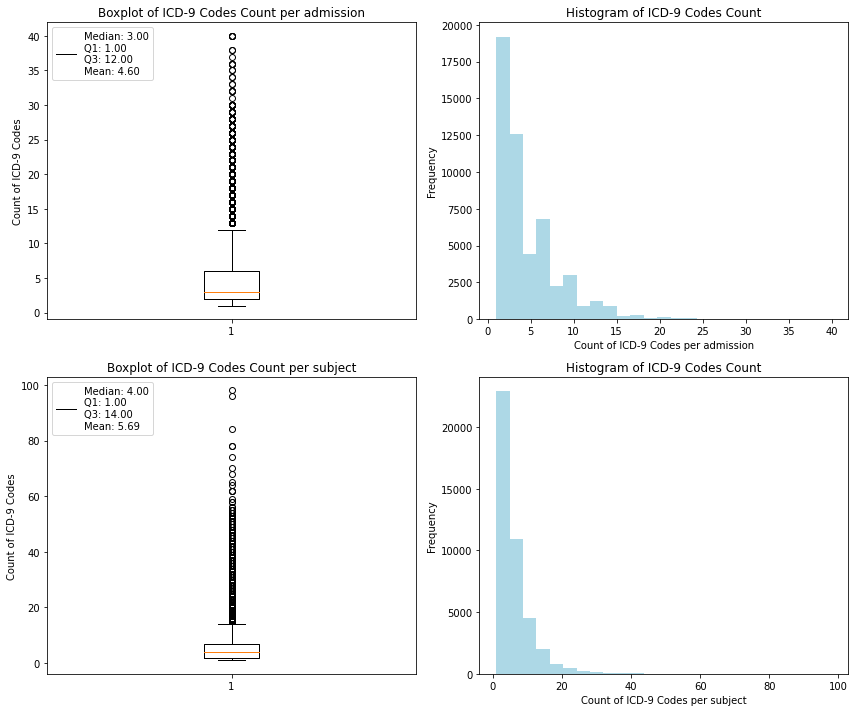

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame

# Count the number of ICD-9 codes per admission
icd9_counts_a = df.groupby('HADM_ID')['ICD9_CODE_procedures'].count().reset_index(name='count_icd9_codes')

# If you have specific admission IDs you want to plot, filter them here
# For example, if you want to plot for admission IDs 'A1', 'A2', 'A3', 'A4', 'A5'
selected_admissions_a = icd9_counts_a

icd9_counts = df.groupby('SUBJECT_ID')['ICD9_CODE_procedures'].count().reset_index(name='count_icd9_codes')

# If you have specific admission IDs you want to plot, filter them here
# For example, if you want to plot for admission IDs 'A1', 'A2', 'A3', 'A4', 'A5'
selected_admissions = icd9_counts

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot of ICD-9 Codes Count per admission
boxplot_a = axs[0, 0].boxplot(selected_admissions_a['count_icd9_codes'])
axs[0, 0].set_title('Boxplot of ICD-9 Codes Count per admission')
axs[0, 0].set_ylabel('Count of ICD-9 Codes')


# Histogram of ICD-9 Codes Count per admission
axs[0, 1].hist(selected_admissions_a['count_icd9_codes'], bins=25, color='lightblue')
axs[0, 1].set_title('Histogram of ICD-9 Codes Count')
axs[0, 1].set_xlabel('Count of ICD-9 Codes per admission')
axs[0, 1].set_ylabel('Frequency')

# Boxplot of ICD-9 Codes Count per subject
boxplot = axs[1, 0].boxplot(selected_admissions['count_icd9_codes'])
axs[1, 0].set_title('Boxplot of ICD-9 Codes Count per subject')
axs[1, 0].set_ylabel('Count of ICD-9 Codes')


# Histogram of ICD-9 Codes Count per subject
axs[1, 1].hist(selected_admissions['count_icd9_codes'], bins=25, color='lightblue')
axs[1, 1].set_title('Histogram of ICD-9 Codes Count')
axs[1, 1].set_xlabel('Count of ICD-9 Codes per subject')
axs[1, 1].set_ylabel('Frequency')

# Add legend with median, quartiles, and mean to both boxplots
legend_text_a = f"Median: {medians_a[0]:.2f}\nQ1: {quartiles_a[0]:.2f}\nQ3: {quartiles_a[1]:.2f}\nMean: {selected_admissions_a['count_icd9_codes'].mean():.2f}"
axs[0, 0].legend([legend_text_a], loc='upper left')

legend_text = f"Median: {medians[0]:.2f}\nQ1: {quartiles[0]:.2f}\nQ3: {quartiles[1]:.2f}\nMean: {selected_admissions['count_icd9_codes'].mean():.2f}"
axs[1, 0].legend([legend_text], loc='upper left')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

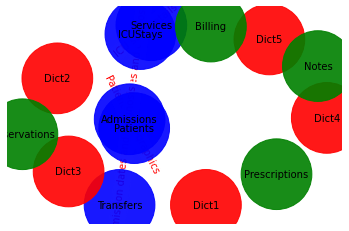

In [71]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes representing tables and some properties to describe them
G.add_node("Patients", type="core", desc="Patient demographics")
G.add_node("Admissions", type="core", desc="Admission dates and diagnosis")
G.add_node("ICUStays", type="core", desc="ICU stay details")
G.add_node("Services", type="core", desc="Service types during stay")
G.add_node("Transfers", type="core", desc="Transfer times and units")

# Add dictionary nodes
G.add_node("Dict1", type="dictionary", desc="Dictionary Table 1")
G.add_node("Dict2", type="dictionary", desc="Dictionary Table 2")
G.add_node("Dict3", type="dictionary", desc="Dictionary Table 3")
G.add_node("Dict4", type="dictionary", desc="Dictionary Table 4")
G.add_node("Dict5", type="dictionary", desc="Dictionary Table 5")

# Add data nodes
G.add_node("Billing", type="data", desc="Billing and codes")
G.add_node("Notes", type="data", desc="Caregiver notes")
G.add_node("Prescriptions", type="data", desc="Medication orders")
G.add_node("Observations", type="data", desc="Observations and measurements")

# Add edges representing relationships
G.add_edge("Patients", "Admissions")
G.add_edge("Admissions", "ICUStays")
G.add_edge("ICUStays", "Services")
G.add_edge("Admissions", "Transfers")

# Visualization configuration
pos = nx.spring_layout(G)  # positions for all nodes

# Set node color to blue for core tables
node_colors = ["blue" if G.nodes[node]['type'] == "core" else "red" if G.nodes[node]['type'] == "dictionary" else "green" for node in G]

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=5000, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Draw the labels
nx.draw_networkx_labels(G, pos, labels={node: node for node in G}, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G.nodes[u]['desc'] for u, v in G.edges}, font_color='red')

# Display the graph
plt.axis('off')
plt.show()

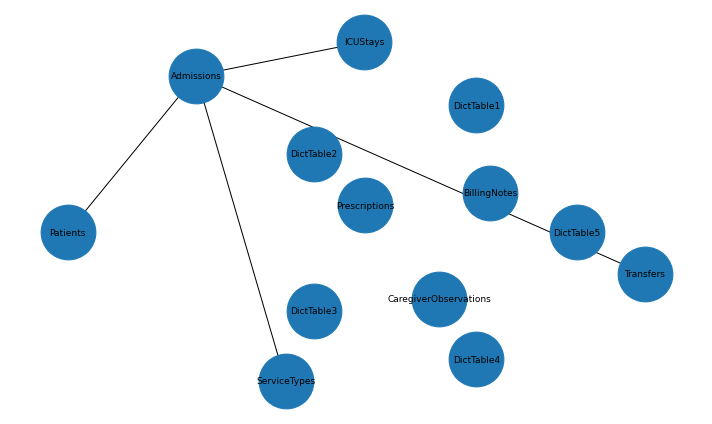

In [72]:
# Let's construct a more detailed diagram with the specific tables mentioned
# We'll use a hierarchical structure where 'Patients' is at the top
# and the 'Dictionary' and 'Data' tables are at the same level at the bottom.

# Create a directed graph
G = nx.DiGraph()

# Add nodes for the main tables
G.add_node("Patients", type="Main", desc="Patient demographics and details")
G.add_node("Admissions", type="Main", desc="Admission events, times, and diagnoses")
G.add_node("ICUStays", type="Main", desc="Details of ICU stays")
G.add_node("ServiceTypes", type="Main", desc="Types of services provided")
G.add_node("Transfers", type="Main", desc="Transfer times, lengths of stay, care units")

# Add nodes for dictionary tables
for i in range(1, 6):
    G.add_node(f"DictTable{i}", type="Dictionary", desc=f"Dictionary Table {i}")

# Add nodes for data tables
G.add_node("BillingNotes", type="Data", desc="Billing information and notes")
G.add_node("Prescriptions", type="Data", desc="Prescriptions data")
G.add_node("CaregiverObservations", type="Data", desc="Observations made by caregivers")

# Define edges with hierarchical relationships
G.add_edge("Patients", "Admissions")
G.add_edge("Admissions", "ICUStays")
G.add_edge("Admissions", "ServiceTypes")
G.add_edge("Admissions", "Transfers")

# Now let's visualize the graph with more detail
plt.figure(figsize=(10, 6))

# We'll use shell layout to create a hierarchical structure
shell_layout = [['BillingNotes', 'Prescriptions', 'CaregiverObservations'],
                [f"DictTable{i}" for i in range(1, 6)],
                ['ICUStays', 'ServiceTypes', 'Transfers'],
                ['Admissions'],
                ['Patients']]

# Draw the nodes
nx.draw_networkx_nodes(G, pos=nx.shell_layout(G, nlist=shell_layout), node_size=3000)

# Draw the edges
nx.draw_networkx_edges(G, pos=nx.shell_layout(G, nlist=shell_layout))

# Draw the labels
nx.draw_networkx_labels(G, pos=nx.shell_layout(G, nlist=shell_layout), font_size=9)

# Remove the axis
plt.axis('off')

# Display the graph
plt.tight_layout()
plt.show()


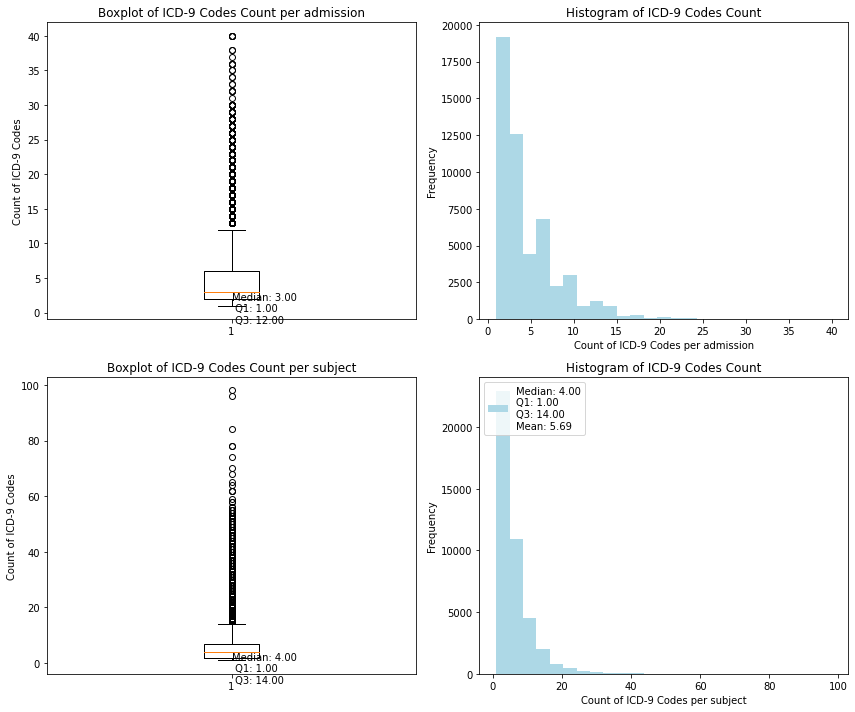

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame

# Count the number of ICD-9 codes per admission
icd9_counts_a = df.groupby('HADM_ID')['ICD9_CODE_procedures'].count().reset_index(name='count_icd9_codes')

# If you have specific admission IDs you want to plot, filter them here
# For example, if you want to plot for admission IDs 'A1', 'A2', 'A3', 'A4', 'A5'
selected_admissions_a = icd9_counts_a

icd9_counts = df.groupby('SUBJECT_ID')['ICD9_CODE_procedures'].count().reset_index(name='count_icd9_codes')

# If you have specific admission IDs you want to plot, filter them here
# For example, if you want to plot for admission IDs 'A1', 'A2', 'A3', 'A4', 'A5'
selected_admissions = icd9_counts

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot of ICD-9 Codes Count per admission
boxplot_a = axs[0, 0].boxplot(selected_admissions_a['count_icd9_codes'])
axs[0, 0].set_title('Boxplot of ICD-9 Codes Count per admission')
axs[0, 0].set_ylabel('Count of ICD-9 Codes')

# Add labels to the boxplot
medians_a = [median.get_ydata()[0] for median in boxplot_a['medians']]
quartiles_a = [q.get_ydata()[1] for q in boxplot_a['whiskers']]
labels_a = [f'Median: {median:.2f}\n Q1: {q1:.2f}\n Q3: {q3:.2f}' for median, q1, q3 in zip(medians_a, quartiles_a[::2], quartiles_a[1::2])]
for label, median in zip(labels_a, medians_a):
    axs[0, 0].text(1, median, label, verticalalignment='top')

# Histogram of ICD-9 Codes Count per admission
axs[0, 1].hist(selected_admissions_a['count_icd9_codes'], bins=25, color='lightblue')
axs[0, 1].set_title('Histogram of ICD-9 Codes Count')
axs[0, 1].set_xlabel('Count of ICD-9 Codes per admission')
axs[0, 1].set_ylabel('Frequency')

# Boxplot of ICD-9 Codes Count per subject
boxplot = axs[1, 0].boxplot(selected_admissions['count_icd9_codes'])
axs[1, 0].set_title('Boxplot of ICD-9 Codes Count per subject')
axs[1, 0].set_ylabel('Count of ICD-9 Codes')

# Add labels to the boxplot
medians = [median.get_ydata()[0] for median in boxplot['medians']]
quartiles = [q.get_ydata()[1] for q in boxplot['whiskers']]
labels = [f'Median: {median:.2f}\n Q1: {q1:.2f}\n Q3: {q3:.2f}' for median, q1, q3 in zip(medians, quartiles[::2], quartiles[1::2])]
for label, median in zip(labels, medians):
    axs[1, 0].text(1, median, label, verticalalignment='top')

# Histogram of ICD-9 Codes Count per subject
axs[1, 1].hist(selected_admissions['count_icd9_codes'], bins=25, color='lightblue')
axs[1, 1].set_title('Histogram of ICD-9 Codes Count')
axs[1, 1].set_xlabel('Count of ICD-9 Codes per subject')
axs[1, 1].set_ylabel('Frequency')

# Add legend with median, quartiles, and mean
legend_text = f"Median: {medians[0]:.2f}\nQ1: {quartiles[0]:.2f}\nQ3: {quartiles[1]:.2f}\nMean: {selected_admissions['count_icd9_codes'].mean():.2f}"
plt.legend([legend_text], loc='upper left')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()